# beijing

In [143]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def gen_dates(b_date, count):
    hour = timedelta(hours=1)
    for i in range(count+1):
        yield b_date + hour*i


def get_date_list(start=None, end=None):
    """
    获取日期列表
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    if start is None:
        start = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
    if end is None:
        end = datetime.now()
    data = []
    for d in gen_dates(start, int((end-start).total_seconds()/3600)):
        data.append(str(d))
    return data


Medium_PM10 = 88
Medium_PM25 = 59
Medium_O3   = 56
Medium_NO2  = 46
Medium_CO   = 1
Medium_SO2  = 9
def to_timedict_bj(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']]).tolist()
    for i in tqdm(['aotizhongxin', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihuayuan', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuiku', 'nansanhuan', 'nongzhanguan', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxigong','xizhimenbei','yanqin','yizhuang','yongdingmennei','yongledian','yufa','yungang']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
    recons['PM2.5'].fillna(Medium_PM25, inplace = True)
    recons['PM10'].fillna(Medium_PM10, inplace = True)
    recons['NO2'].fillna(Medium_NO2, inplace = True)
    recons['CO'].fillna(Medium_CO, inplace = True)
    recons['O3'].fillna(Medium_O3, inplace = True)
    recons['SO2'].fillna(Medium_SO2, inplace = True)
#     recons.fillna(method= 'pad')
    
    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['stationId']=='dongsi_aq',['lon','lat']] = [116.417,39.929]
    recons.loc[recons['stationId']=='tiantan_aq',['lon','lat']] = [116.407,39.886]
    recons.loc[recons['stationId']=='guanyuan_aq',['lon','lat']] = [116.339,39.929]
    recons.loc[recons['stationId']=='wanshouxigong_aq',['lon','lat']] = [116.352,39.878]
    recons.loc[recons['stationId']=='aotizhongxin_aq',['lon','lat']] = [116.397,39.982]
    recons.loc[recons['stationId']=='nongzhanguan_aq',['lon','lat']] = [116.461,39.937]
    recons.loc[recons['stationId']=='wanliu_aq',['lon','lat']] = [116.287,39.987]
    recons.loc[recons['stationId']=='beibuxinqu_aq',['lon','lat']] = [116.174,40.09]
    recons.loc[recons['stationId']=='zhiwuyuan_aq',['lon','lat']] = [116.207,40.002]
    recons.loc[recons['stationId']=='fengtaihuayuan_aq',['lon','lat']] = [116.279,39.863]
    recons.loc[recons['stationId']=='yungang_aq',['lon','lat']] = [116.146,39.824]
    recons.loc[recons['stationId']=='gucheng_aq',['lon','lat']] = [116.184,39.914]
    recons.loc[recons['stationId']=='fangshan_aq',['lon','lat']] = [116.136,39.742]
    recons.loc[recons['stationId']=='daxing_aq',['lon','lat']] = [116.404,39.718]
    recons.loc[recons['stationId']=='yizhuang_aq',['lon','lat']] = [116.506,39.795]
    recons.loc[recons['stationId']=='tongzhou_aq',['lon','lat']] = [116.663,39.886]
    recons.loc[recons['stationId']=='shunyi_aq',['lon','lat']] = [116.655,40.127]
    recons.loc[recons['stationId']=='pingchang_aq',['lon','lat']] = [116.23,40.217]
    recons.loc[recons['stationId']=='mentougou_aq',['lon','lat']] = [116.106,39.937]
    recons.loc[recons['stationId']=='pinggu_aq',['lon','lat']] = [117.1,40.143]
    recons.loc[recons['stationId']=='hureconsou_aq',['lon','lat']] = [116.628,40.328]
    recons.loc[recons['stationId']=='miyun_aq',['lon','lat']] = [116.832,40.37]
    recons.loc[recons['stationId']=='yanqin_aq',['lon','lat']] = [115.972,40.453]
    recons.loc[recons['stationId']=='dingling_aq',['lon','lat']] = [116.22,40.292]
    recons.loc[recons['stationId']=='badaling_aq',['lon','lat']] = [115.988,40.365]
    recons.loc[recons['stationId']=='miyunshuiku_aq',['lon','lat']] = [116.911,40.499]
    recons.loc[recons['stationId']=='donggaocun_aq',['lon','lat']] = [117.12,40.1]
    recons.loc[recons['stationId']=='yongledian_aq',['lon','lat']] = [116.783,39.712]
    recons.loc[recons['stationId']=='yufa_aq',['lon','lat']] = [116.3,39.52]
    recons.loc[recons['stationId']=='liulihe_aq',['lon','lat']] = [116,39.58]
    recons.loc[recons['stationId']=='qianmen_aq',['lon','lat']] = [116.395,39.899]
    recons.loc[recons['stationId']=='yongdingmennei_aq',['lon','lat']] = [116.394,39.876]
    recons.loc[recons['stationId']=='xizhimenbei_aq',['lon','lat']] = [116.349,39.954]
    recons.loc[recons['stationId']=='nansanhuan_aq',['lon','lat']] = [116.368,39.856]
    recons.loc[recons['stationId']=='dongsihuan_aq',['lon','lat']] = [116.483,39.939]
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5','PM10','NO2','CO','O3','SO2']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
        
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 272:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    ######################处理缺失时间点完毕#####################shunyi_meo


    recons_meo = pd.DataFrame(columns=('station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather'))

    alt = np.array(meo[['station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    for i in tqdm(['shunyi_meo','hadian_meo','yanqing_meo','miyun_meo','huairou_meo','shangdianzi_meo','pinggu_meo','tongzhou_meo','chaoyang_meo','pingchang_meo','zhaitang_meo','mentougou_meo','beijing_meo','shijingshan_meo','fengtai_meo','daxing_meo','fangshan_meo','xiayunling_meo']):
        count = 0
        for j in meo['station_id']:
            if j == i:
                recons_meo.loc[count] = alt[count]
            count += 1 
    
    for i in range(len(recons_meo['wind_speed'])):
        if recons_meo['wind_speed'][i] == 999017:
            recons_meo.loc[i,'wind_speed'] = recons_meo.loc[i-1,'wind_speed']
    recons_meo['longitude'] = 0 ##经度
    recons_meo['latitude'] = 0  ##纬度
    recons_meo.loc[recons_meo['station_id']=='shunyi_meo',['longitude','latitude']] = [116.6153,40.12667]
    recons_meo.loc[recons_meo['station_id']=='haidian_meo',['longitude','latitude']] = [116.2906,39.98694]
    recons_meo.loc[recons_meo['station_id']=='yanqing_meo',['longitude','latitude']] = [115.9689,40.44944]
    recons_meo.loc[recons_meo['station_id']=='miyun_meo',['longitude','latitude']] = [116.8642,40.3775]
    recons_meo.loc[recons_meo['station_id']=='huairou_meo',['longitude','latitude']] = [116.6269,40.35778]
    recons_meo.loc[recons_meo['station_id']=='shangdianzi_meo',['longitude','latitude']] = [117.1117,40.65889]
    recons_meo.loc[recons_meo['station_id']=='pinggu_meo',['longitude','latitude']] = [117.1178,40.16944]
    recons_meo.loc[recons_meo['station_id']=='tongzhou_meo',['longitude','latitude']] = [116.7567,39.8475]
    recons_meo.loc[recons_meo['station_id']=='chaoyang_meo',['longitude','latitude']] = [116.5008,39.9525]
    recons_meo.loc[recons_meo['station_id']=='pingchang_meo',['longitude','latitude']] = [116.2117,40.22333]
    recons_meo.loc[recons_meo['station_id']=='zhaitang_meo',['longitude','latitude']] = [115.6922,39.97389]
    recons_meo.loc[recons_meo['station_id']=='mentougou_meo',['longitude','latitude']] = [116.1564,39.88778]
    recons_meo.loc[recons_meo['station_id']=='beijing_meo',['longitude','latitude']] = [116.4694,39.80611]
    recons_meo.loc[recons_meo['station_id']=='shijingshan_meo',['longitude','latitude']] = [116.2053,39.9425]
    recons_meo.loc[recons_meo['station_id']=='fengtai_meo',['longitude','latitude']] = [116.2453,39.87028]
    recons_meo.loc[recons_meo['station_id']=='daxing_meo',['longitude','latitude']] = [116.3544,39.71861]
    recons_meo.loc[recons_meo['station_id']=='fangshan_meo',['longitude','latitude']] = [116.1942,39.77306]
    recons_meo.loc[recons_meo['station_id']=='xiayunling_meo',['longitude','latitude']] = [115.7406,39.72861]

    recons_meo.loc[meo['weather'] == 'Sunny/clear' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Snow' , 'weather'] = 1
    recons_meo.loc[meo['weather'] == 'Sleet' , 'weather'] = 2
    recons_meo.loc[meo['weather'] == 'Sand' , 'weather'] = 3
    recons_meo.loc[meo['weather'] == 'Rain/Snow with Hail' , 'weather'] = 4
    recons_meo.loc[meo['weather'] == 'Rain with Hail' , 'weather'] = 5
    recons_meo.loc[meo['weather'] == 'Rain' , 'weather'] = 6
    recons_meo.loc[meo['weather'] == 'Haze' , 'weather'] = 7
    recons_meo.loc[meo['weather'] == 'Fog' , 'weather'] = 8
    recons_meo.loc[meo['weather'] == 'Dust' , 'weather'] = 9
    recons_meo.loc[meo['weather'] == 'Hail' , 'weather'] = 4
    recons_meo.loc[meo['weather'] == 'Cloudy' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Overcast' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Thundershower' , 'weather'] = 6
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    recons_meo['temperature'] = recons_meo['temperature'].apply(div5)
    recons_meo['pressure'] = recons_meo['pressure'].apply(div5)
    recons_meo['humidity'] = recons_meo['humidity'].apply(div5)
    recons_meo['wind_direction'] = recons_meo['wind_direction'].apply(div15)
    recons_meo['wind_speed'] = recons_meo['wind_speed'].apply(div05)
    #############wether量化###############

    #############处理缺失时间点##########
    count = 0
    Idx = 0  ####索引记录####
    meo_list = np.array(recons_meo[['temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    

    for i in tqdm(np.array(recons_meo['time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(meo_list[Idx])

        Idx += 1
        
    length = []  
    
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    ######################处理缺失时间点完毕#####################
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(1150,1181,1):
        for j in range(390,411,1):
            if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                meo_grid.loc[meo_grid['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                 print([i,j])
            count += 1
    
    meo_grid.drop(meo_grid[meo_grid['longitude'] < 115.6].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] > 117.2].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 39.5].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 40.7].index.tolist(),inplace= True)
    meo_grid.drop('id',axis = 1)
    meo_grid.drop_duplicates(inplace=True)
    meo_grid.reset_index(drop=True,inplace=True)
#     print(meo_grid.head(100))
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    
    
    
    
    count = 1
    Idx = 0  ####索引记录####

    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 9:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1])
            if count > 9:
                for j in range(count-9):
                    alt_dict[i].extend(meo_grid_list[Idx+1])
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
        
        
        
        
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) != 1485:
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
            
            
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(1150,1181,1):
            for j in range(390,411,1):
                if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                    weather_fore.loc[weather_fore['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < 115.6].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 117.2].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 39.5].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 40.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        weather_fore_array = np.array(weather_fore['weather'])
        
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 12093:
            pop_list.append(k)
    print(pop_list)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(12093-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(1485,12093))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))])
            alt_dict[i][1485:12093] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))]).tolist()
        count += 1
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 16
#     win = 168
    
    for i in tqdm(range(68,272)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-win:count]),np.std(alt_frame[i][count-win:count])])
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-int(win/2):count]),np.std(alt_frame[i][count-int(win/2):count])])
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-int(win/4):count]),np.std(alt_frame[i][count-int(win/4):count])])
                if i == 271:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,10,11,12]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [16,17,18,19,20]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,6):
            SUM = 0
            for j in range(0,34):
                SUM += alt_dict[k][68+j*6+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0,0,0,0])
        else:
            for m,n in zip(alt_dict[k][-6:] ,alt_dict[hour_last][-12:-6]):
                alt_dict[k].append(m-n)

        hour_last = k
        count += 1
    ##########标签值 PM10 PM2.5 O3##########
    step = 72  ####预测间隔
    for i in tqdm(range(68,272)):  ##训练数据
        count = 0
        for j in alt_frame[i]:
            if count+step < len(alt_frame[i]) and ((i-68)%6 == 0 or (i-68)%6 == 1 or (i-68)%6 == 4):
                alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
            count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 4973:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i]) <  max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [144]:
Start = datetime.strptime("2018-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-18 23:00:00", "%Y-%m-%d %H:%M:%S")

pre_dict_bj = to_timedict_bj(start = Start, end = End)
pre_frame_bj = pd.DataFrame.from_dict(pre_dict_bj).T
pre_list_bj = np.array(pre_frame_bj)

  0%|          | 0/18 [00:00<?, ?it/s]

272
272


100%|██████████| 7553/7553 [00:00<00:00, 1554902.23it/s]


380
272
380
380


  0%|          | 0/432 [00:00<?, ?it/s]

1485
380
1485
1485


100%|██████████| 432/432 [07:35<00:00,  1.06s/it]


['2018-05-03 18:00:00', '2018-05-10 20:00:00', '2018-05-05 19:00:00', '2018-05-05 10:00:00', '2018-05-05 23:00:00', '2018-05-03 20:00:00', '2018-05-07 09:00:00', '2018-05-05 18:00:00', '2018-05-05 11:00:00', '2018-05-05 22:00:00', '2018-05-05 16:00:00', '2018-05-05 13:00:00', '2018-05-03 19:00:00', '2018-05-05 17:00:00', '2018-05-05 20:00:00', '2018-05-05 12:00:00', '2018-05-05 14:00:00', '2018-05-05 15:00:00', '2018-05-05 21:00:00']
12093
1485


100%|██████████| 204/204 [00:00<00:00, 262.62it/s]


13434
12207
13434
13434


In [145]:
pre_list_bj.shape

(312, 13434)

In [146]:
pre_frame_bj.index

Index(['2018-05-03 00:00:00', '2018-05-03 01:00:00', '2018-05-03 02:00:00',
       '2018-05-03 03:00:00', '2018-05-03 04:00:00', '2018-05-03 05:00:00',
       '2018-05-03 06:00:00', '2018-05-03 07:00:00', '2018-05-03 08:00:00',
       '2018-05-03 09:00:00',
       ...
       '2018-05-15 14:00:00', '2018-05-15 15:00:00', '2018-05-15 16:00:00',
       '2018-05-15 17:00:00', '2018-05-15 18:00:00', '2018-05-15 19:00:00',
       '2018-05-15 20:00:00', '2018-05-15 21:00:00', '2018-05-15 22:00:00',
       '2018-05-15 23:00:00'],
      dtype='object', length=312)

In [147]:
pre_frame_bj.to_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/bj_mean_std.csv')

# London

In [148]:
Medium_PM10 = 13.437369
Medium_PM25 = 20.921357
Medium_O3   = 43.428245

def to_timedict_ld(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid.drop('id',axis=1, inplace = True)
    meo_grid.drop_duplicates(inplace = True)
    meo_grid.reset_index(drop = True, inplace =True)
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration']]).tolist()
    for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.drop_duplicates(inplace = True)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['station_id'] == 'TH4' , 'NO2 (ug/m3)'])
    recons['PM2.5 (ug/m3)'].fillna(Medium_PM25, inplace = True)
    recons['PM10 (ug/m3)'].fillna(Medium_PM10, inplace = True)
    recons['NO2 (ug/m3)'].fillna(Medium_NO2, inplace = True)

    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='CD9',['lon','lat']] = [-0.129053205,51.52770662]
    recons.loc[recons['station_id']=='CD1',['lon','lat']] = [-0.175284,51.544219]
    recons.loc[recons['station_id']=='GN0',['lon','lat']] = [0.074003,51.490532]
    recons.loc[recons['station_id']=='GR4',['lon','lat']] = [0.070766,51.45258]
    recons.loc[recons['station_id']=='GN3',['lon','lat']] = [0.095111,51.486957]
    recons.loc[recons['station_id']=='GR9',['lon','lat']] = [0.040725,51.456357]
    recons.loc[recons['station_id']=='HV1',['lon','lat']] = [0.205460706,51.52078746]
    recons.loc[recons['station_id']=='KF1',['lon','lat']] = [-0.21349214,51.52104675]
    recons.loc[recons['station_id']=='LW2',['lon','lat']] = [-0.039641,51.474954]
    recons.loc[recons['station_id']=='ST5',['lon','lat']] = [-0.141661525,51.3892869]
    recons.loc[recons['station_id']=='TH4',['lon','lat']] = [-0.008418493,51.51504617]
    recons.loc[recons['station_id']=='MY7',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.15459,51.52254]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))

    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(-20,21,1):
        for j in range(505,526,1):
            if (i >= -4 and i <=3) and (j >= 513 and j <= 517):
                meo_grid.loc[meo_grid['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
            count += 1
#     print(meo_grid)
    meo_grid.drop(meo_grid[meo_grid['longitude'] < -0.4].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] >  0.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 51.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 51.7].index.tolist(),inplace= True)
    meo_grid.reset_index(drop = True,inplace = True)
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
#     print(meo_grid)
    count = 1
    Idx = 0  ####索引记录####
#     print(meo_grid['station_id'][15561])
    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 17:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1]) 
            if count > 17:
                for j in range(count-17):
                    alt_dict[i].extend(meo_grid_list[Idx+1]) 
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 2217:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0])!= 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace=True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(-20,21,1):
            for j in range(505,526,1):
                if (i >= -4 and i <= 3) and (j >= 513 and j <= 517):
                    weather_fore.loc[weather_fore['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < -0.4].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 0.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 51.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 51.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        weather_fore_array = np.array(weather_fore['weather'])
        
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 2185:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(2185-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(265,2185))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))])
            alt_dict[i][265:2185] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))]).tolist()
        count += 1
#     print(alt_frame[62])
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 168

    for i in tqdm(range(26,65)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-win:count]),np.std(alt_frame[i][count-win:count])])
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-int(win/2):count]),np.std(alt_frame[i][count-int(win/2):count])])
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-int(win/4):count]),np.std(alt_frame[i][count-int(win/4):count])])
                if i == 64:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
#                     if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [8,9,10,18,19,20]: #####是否为早晚高峰时段（北京转utc时间）
#                         alt_dict[alt_frame.index[count]].extend([2])
#                     elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,3,4,5]:
#                         alt_dict[alt_frame.index[count]].extend([1])
#                     else:
#                         alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,3):
            SUM = 0
            for j in range(0,13):
                SUM += alt_dict[k][26+j*3+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0])
        else:
            for m,n in zip(alt_dict[k][-3:] ,alt_dict[hour_last][-6:-3]):
                alt_dict[k].append(m-n)
        hour_last = k
        count += 1
    ##########标签值 PM10 PM2.5 O3##########
    step = 72
    for i in tqdm(range(26,65)):  ##训练数据
        count = 0
        for j in alt_frame[i]:
            if count+step < len(alt_frame[i]) and ((i-26)%3 == 0 or (i-26)%3 == 1):
                alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
            count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 6092:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
            
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i])<max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [149]:
Start = datetime.strptime("2018-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-18 23:00:00", "%Y-%m-%d %H:%M:%S")
pre_dict_ld = to_timedict_ld(start = Start, end = End)
pre_frame_ld = pd.DataFrame.from_dict(pre_dict_ld).T
pre_list_ld = np.array(pre_frame_ld)

100%|██████████| 5610/5610 [00:00<00:00, 1888749.83it/s]


65
50
65
65


  0%|          | 0/432 [00:00<?, ?it/s]

265
65


  0%|          | 0/39 [00:00<?, ?it/s]

2185
65


100%|██████████| 39/39 [00:00<00:00, 210.75it/s]


2453
2217
2453
2453


In [150]:
pre_list_ld.shape

(312, 2453)

In [151]:
pre_frame_ld.index

Index(['2018-05-03 00:00:00', '2018-05-03 01:00:00', '2018-05-03 02:00:00',
       '2018-05-03 03:00:00', '2018-05-03 04:00:00', '2018-05-03 05:00:00',
       '2018-05-03 06:00:00', '2018-05-03 07:00:00', '2018-05-03 08:00:00',
       '2018-05-03 09:00:00',
       ...
       '2018-05-15 14:00:00', '2018-05-15 15:00:00', '2018-05-15 16:00:00',
       '2018-05-15 17:00:00', '2018-05-15 18:00:00', '2018-05-15 19:00:00',
       '2018-05-15 20:00:00', '2018-05-15 21:00:00', '2018-05-15 22:00:00',
       '2018-05-15 23:00:00'],
      dtype='object', length=312)

In [152]:
pre_frame_ld.to_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/ld_mean_std.csv')

In [153]:
import pandas as pd
import numpy as np
beijing_train = np.array(pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/bj_mean_std.csv'))[:,1:]
London_train = np.array(pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/ld_mean_std.csv'))[:,1:]
def sMAPE(preds, xgb_train):   
    s = 0
    label = xgb_train.get_label()
    length = len(label)
    for i in range(length):
        s += float(np.abs(preds[i] - label[i]))/ (float(np.abs(preds[i]) + np.abs(label[i])) / 2.)
    sMAPE = s/float(length)
    return 'sMAPE',float(sMAPE)

# MODEL BJ

In [154]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
train_data, val_data = train_test_split(beijing_train, test_size = 0.3, random_state = 1)###随机数原始为1
# train_data, val_data = beijing_train[:-48,:], beijing_train[-48:,:]###随机数原始为1

# PM2.5

  0%|          | 0/34 [00:00<?, ?it/s]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:130.449	val-gamma-nloglik:123.198	train-sMAPE:1.9561	val-sMAPE:1.95512
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.09204	val-gamma-nloglik:5.07109	train-sMAPE:0.010682	val-sMAPE:0.136761
[200]	train-gamma-nloglik:5.09196	val-gamma-nloglik:5.0705	train-sMAPE:0.000742	val-sMAPE:0.134108
[300]	train-gamma-nloglik:5.09196	val-gamma-nloglik:5.07049	train-sMAPE:0.000421	val-sMAPE:0.134019
Stopping. Best iteration:
[252]	train-gamma-nloglik:5.09196	val-gamma-nloglik:5.07049	train-sMAPE:0.000421	val-sMAPE:0.134019



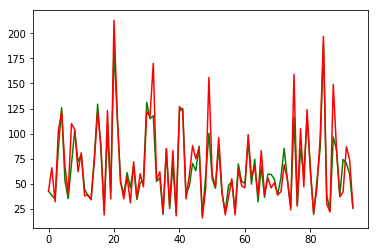

  3%|▎         | 1/34 [00:09<05:12,  9.47s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:129.159	val-gamma-nloglik:118.746	train-sMAPE:1.95478	val-sMAPE:1.95235
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.08325	val-gamma-nloglik:5.03984	train-sMAPE:0.010937	val-sMAPE:0.146225
[200]	train-gamma-nloglik:5.08315	val-gamma-nloglik:5.03939	train-sMAPE:0.00047	val-sMAPE:0.144385
Stopping. Best iteration:
[152]	train-gamma-nloglik:5.08316	val-gamma-nloglik:5.03942	train-sMAPE:0.001678	val-sMAPE:0.144355



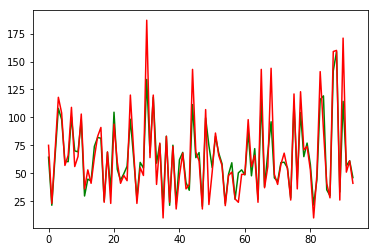

  6%|▌         | 2/34 [00:16<04:23,  8.24s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:116.934	val-gamma-nloglik:105.794	train-sMAPE:1.94807	val-sMAPE:1.93586
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.97147	val-gamma-nloglik:4.90641	train-sMAPE:0.009389	val-sMAPE:0.155339
[200]	train-gamma-nloglik:4.97141	val-gamma-nloglik:4.90611	train-sMAPE:0.000555	val-sMAPE:0.153599
Stopping. Best iteration:
[176]	train-gamma-nloglik:4.97141	val-gamma-nloglik:4.90611	train-sMAPE:0.000928	val-sMAPE:0.153578



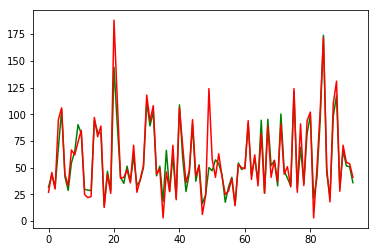

  9%|▉         | 3/34 [00:23<04:07,  7.99s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:117.553	val-gamma-nloglik:120.165	train-sMAPE:1.95009	val-sMAPE:1.95272
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.98168	val-gamma-nloglik:5.03597	train-sMAPE:0.009834	val-sMAPE:0.16422
[200]	train-gamma-nloglik:4.98161	val-gamma-nloglik:5.03544	train-sMAPE:0.000497	val-sMAPE:0.16184
Stopping. Best iteration:
[245]	train-gamma-nloglik:4.98161	val-gamma-nloglik:5.03544	train-sMAPE:0.000408	val-sMAPE:0.161815



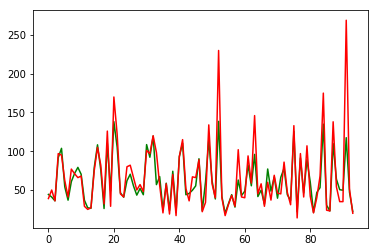

 12%|█▏        | 4/34 [00:32<04:07,  8.24s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:106.878	val-gamma-nloglik:97.1425	train-sMAPE:1.91494	val-sMAPE:1.89855
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.70703	val-gamma-nloglik:4.72286	train-sMAPE:0.015855	val-sMAPE:0.300749
[200]	train-gamma-nloglik:4.70682	val-gamma-nloglik:4.72272	train-sMAPE:0.000957	val-sMAPE:0.298062
Stopping. Best iteration:
[219]	train-gamma-nloglik:4.70682	val-gamma-nloglik:4.7227	train-sMAPE:0.000616	val-sMAPE:0.298034



 15%|█▍        | 5/34 [00:41<04:02,  8.35s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:127.161	val-gamma-nloglik:119.609	train-sMAPE:1.94776	val-sMAPE:1.94924
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.99667	val-gamma-nloglik:5.01499	train-sMAPE:0.014747	val-sMAPE:0.168348
[200]	train-gamma-nloglik:4.99649	val-gamma-nloglik:5.01409	train-sMAPE:0.000956	val-sMAPE:0.166109
Stopping. Best iteration:
[198]	train-gamma-nloglik:4.99649	val-gamma-nloglik:5.01409	train-sMAPE:0.001001	val-sMAPE:0.166105



 18%|█▊        | 6/34 [00:49<03:52,  8.31s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:130.322	val-gamma-nloglik:123.929	train-sMAPE:1.95747	val-sMAPE:1.95784
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.10866	val-gamma-nloglik:5.09564	train-sMAPE:0.009046	val-sMAPE:0.120005
[200]	train-gamma-nloglik:5.1086	val-gamma-nloglik:5.0952	train-sMAPE:0.000507	val-sMAPE:0.117666
Stopping. Best iteration:
[218]	train-gamma-nloglik:5.1086	val-gamma-nloglik:5.0952	train-sMAPE:0.00041	val-sMAPE:0.117641



 21%|██        | 7/34 [00:58<03:45,  8.37s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:136.176	val-gamma-nloglik:126.26	train-sMAPE:1.94478	val-sMAPE:1.94408
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.00847	val-gamma-nloglik:4.98076	train-sMAPE:0.011046	val-sMAPE:0.161999
[200]	train-gamma-nloglik:5.00838	val-gamma-nloglik:4.97986	train-sMAPE:0.000568	val-sMAPE:0.158956
Stopping. Best iteration:
[222]	train-gamma-nloglik:5.00838	val-gamma-nloglik:4.97985	train-sMAPE:0.000416	val-sMAPE:0.158905



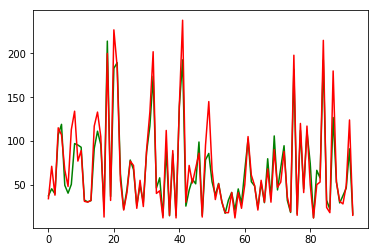

 24%|██▎       | 8/34 [01:07<03:38,  8.40s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:114.714	val-gamma-nloglik:112.948	train-sMAPE:1.95086	val-sMAPE:1.95349
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.9776	val-gamma-nloglik:5.00272	train-sMAPE:0.008239	val-sMAPE:0.137981
[200]	train-gamma-nloglik:4.97755	val-gamma-nloglik:5.00218	train-sMAPE:0.000448	val-sMAPE:0.13501
Stopping. Best iteration:
[218]	train-gamma-nloglik:4.97755	val-gamma-nloglik:5.00217	train-sMAPE:0.000401	val-sMAPE:0.134998



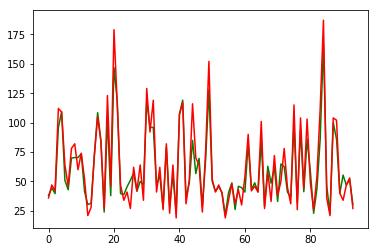

 26%|██▋       | 9/34 [01:15<03:29,  8.40s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:145.39	val-gamma-nloglik:144.668	train-sMAPE:1.95716	val-sMAPE:1.95989
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.19726	val-gamma-nloglik:5.24835	train-sMAPE:0.014361	val-sMAPE:0.219759
[200]	train-gamma-nloglik:5.1971	val-gamma-nloglik:5.2477	train-sMAPE:0.000676	val-sMAPE:0.21813
Stopping. Best iteration:
[224]	train-gamma-nloglik:5.1971	val-gamma-nloglik:5.24769	train-sMAPE:0.000416	val-sMAPE:0.218104



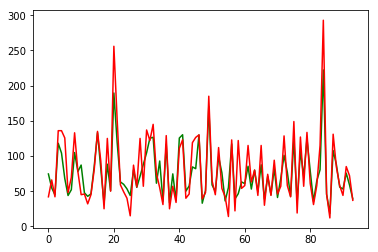

 29%|██▉       | 10/34 [01:24<03:22,  8.43s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:133.367	val-gamma-nloglik:128.533	train-sMAPE:1.95312	val-sMAPE:1.95731
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.08471	val-gamma-nloglik:5.12179	train-sMAPE:0.01272	val-sMAPE:0.146557
[200]	train-gamma-nloglik:5.0846	val-gamma-nloglik:5.12097	train-sMAPE:0.000577	val-sMAPE:0.14227
Stopping. Best iteration:
[230]	train-gamma-nloglik:5.0846	val-gamma-nloglik:5.12096	train-sMAPE:0.000412	val-sMAPE:0.142205



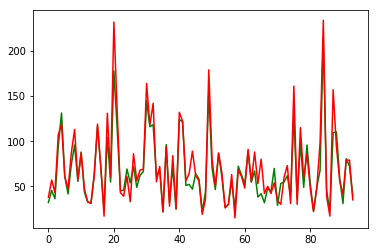

 32%|███▏      | 11/34 [01:32<03:14,  8.44s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:145.105	val-gamma-nloglik:136.892	train-sMAPE:1.95957	val-sMAPE:1.95872
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.19575	val-gamma-nloglik:5.17304	train-sMAPE:0.010051	val-sMAPE:0.143407
[200]	train-gamma-nloglik:5.19567	val-gamma-nloglik:5.17232	train-sMAPE:0.000434	val-sMAPE:0.139068
Stopping. Best iteration:
[207]	train-gamma-nloglik:5.19567	val-gamma-nloglik:5.17231	train-sMAPE:0.00041	val-sMAPE:0.139064



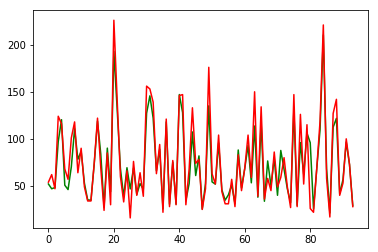

 35%|███▌      | 12/34 [01:40<03:05,  8.41s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:120.348	val-gamma-nloglik:116.612	train-sMAPE:1.94449	val-sMAPE:1.94212
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.94662	val-gamma-nloglik:4.93827	train-sMAPE:0.009609	val-sMAPE:0.168607
[200]	train-gamma-nloglik:4.94654	val-gamma-nloglik:4.93753	train-sMAPE:0.000407	val-sMAPE:0.164264
Stopping. Best iteration:
[193]	train-gamma-nloglik:4.94654	val-gamma-nloglik:4.93753	train-sMAPE:0.000451	val-sMAPE:0.164264



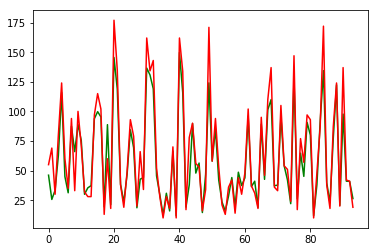

 38%|███▊      | 13/34 [01:48<02:55,  8.36s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:142.838	val-gamma-nloglik:135.939	train-sMAPE:1.96248	val-sMAPE:1.96161
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.22801	val-gamma-nloglik:5.20577	train-sMAPE:0.010564	val-sMAPE:0.137754
[200]	train-gamma-nloglik:5.22792	val-gamma-nloglik:5.20524	train-sMAPE:0.000483	val-sMAPE:0.134647
Stopping. Best iteration:
[207]	train-gamma-nloglik:5.22792	val-gamma-nloglik:5.20524	train-sMAPE:0.000435	val-sMAPE:0.134636



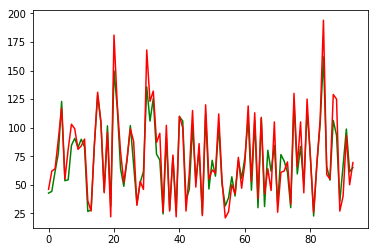

 41%|████      | 14/34 [01:56<02:47,  8.35s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:135.607	val-gamma-nloglik:124.103	train-sMAPE:1.95484	val-sMAPE:1.95445
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.10728	val-gamma-nloglik:5.07316	train-sMAPE:0.01185	val-sMAPE:0.158847
[200]	train-gamma-nloglik:5.10716	val-gamma-nloglik:5.07235	train-sMAPE:0.000489	val-sMAPE:0.155058
Stopping. Best iteration:
[227]	train-gamma-nloglik:5.10716	val-gamma-nloglik:5.07234	train-sMAPE:0.000437	val-sMAPE:0.155045



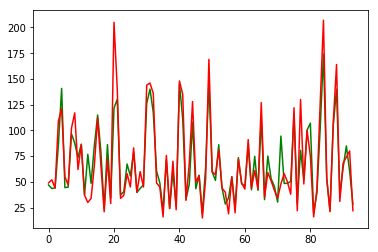

 44%|████▍     | 15/34 [02:05<02:39,  8.39s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:121.135	val-gamma-nloglik:113.619	train-sMAPE:1.94598	val-sMAPE:1.93981
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.96602	val-gamma-nloglik:4.93092	train-sMAPE:0.010196	val-sMAPE:0.177389
[200]	train-gamma-nloglik:4.96594	val-gamma-nloglik:4.93009	train-sMAPE:0.000537	val-sMAPE:0.174477
Stopping. Best iteration:
[220]	train-gamma-nloglik:4.96594	val-gamma-nloglik:4.93008	train-sMAPE:0.000414	val-sMAPE:0.174446



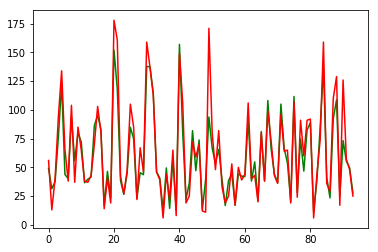

 47%|████▋     | 16/34 [02:14<02:31,  8.40s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:104.69	val-gamma-nloglik:98.4323	train-sMAPE:1.9409	val-sMAPE:1.93646
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.84819	val-gamma-nloglik:4.79561	train-sMAPE:0.010922	val-sMAPE:0.138213
[200]	train-gamma-nloglik:4.84809	val-gamma-nloglik:4.79512	train-sMAPE:0.000719	val-sMAPE:0.13507
Stopping. Best iteration:
[225]	train-gamma-nloglik:4.84809	val-gamma-nloglik:4.79512	train-sMAPE:0.000395	val-sMAPE:0.135062



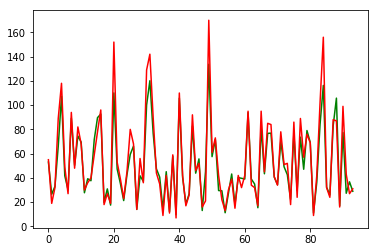

 50%|█████     | 17/34 [02:23<02:23,  8.42s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:108.745	val-gamma-nloglik:106.78	train-sMAPE:1.93828	val-sMAPE:1.94202
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.83389	val-gamma-nloglik:4.86326	train-sMAPE:0.010228	val-sMAPE:0.144018
[200]	train-gamma-nloglik:4.83381	val-gamma-nloglik:4.86242	train-sMAPE:0.000443	val-sMAPE:0.140237
Stopping. Best iteration:
[229]	train-gamma-nloglik:4.83381	val-gamma-nloglik:4.86242	train-sMAPE:0.000399	val-sMAPE:0.140218



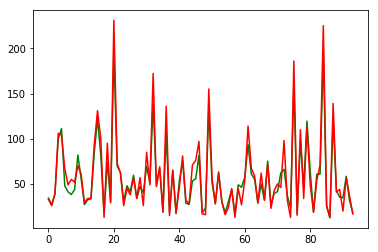

 53%|█████▎    | 18/34 [02:32<02:15,  8.47s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:124.745	val-gamma-nloglik:117.735	train-sMAPE:1.95349	val-sMAPE:1.95391
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.04438	val-gamma-nloglik:5.03178	train-sMAPE:0.009711	val-sMAPE:0.122329
[200]	train-gamma-nloglik:5.04431	val-gamma-nloglik:5.0313	train-sMAPE:0.000634	val-sMAPE:0.120162
Stopping. Best iteration:
[237]	train-gamma-nloglik:5.04431	val-gamma-nloglik:5.0313	train-sMAPE:0.000441	val-sMAPE:0.120124



 56%|█████▌    | 19/34 [02:42<02:08,  8.55s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:121.164	val-gamma-nloglik:114.276	train-sMAPE:1.94469	val-sMAPE:1.94812
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.95724	val-gamma-nloglik:4.97673	train-sMAPE:0.011808	val-sMAPE:0.162764
[200]	train-gamma-nloglik:4.95713	val-gamma-nloglik:4.97625	train-sMAPE:0.000413	val-sMAPE:0.160187
Stopping. Best iteration:
[210]	train-gamma-nloglik:4.95713	val-gamma-nloglik:4.97625	train-sMAPE:0.000387	val-sMAPE:0.160181



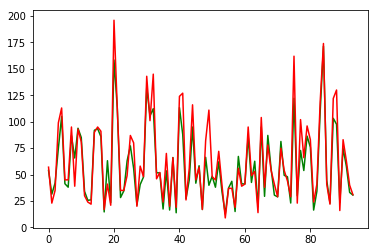

 59%|█████▉    | 20/34 [02:51<02:00,  8.57s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:125.717	val-gamma-nloglik:121.54	train-sMAPE:1.95093	val-sMAPE:1.9537
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.01693	val-gamma-nloglik:5.04912	train-sMAPE:0.010947	val-sMAPE:0.119717
[200]	train-gamma-nloglik:5.01683	val-gamma-nloglik:5.04891	train-sMAPE:0.000583	val-sMAPE:0.118113
Stopping. Best iteration:
[179]	train-gamma-nloglik:5.01683	val-gamma-nloglik:5.04891	train-sMAPE:0.000885	val-sMAPE:0.118102



 62%|██████▏   | 21/34 [02:59<01:51,  8.56s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:127.43	val-gamma-nloglik:120.972	train-sMAPE:1.95298	val-sMAPE:1.95387
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.05354	val-gamma-nloglik:5.04715	train-sMAPE:0.011552	val-sMAPE:0.147607
[200]	train-gamma-nloglik:5.05344	val-gamma-nloglik:5.04662	train-sMAPE:0.000773	val-sMAPE:0.145395
Stopping. Best iteration:
[197]	train-gamma-nloglik:5.05344	val-gamma-nloglik:5.04662	train-sMAPE:0.00083	val-sMAPE:0.145381



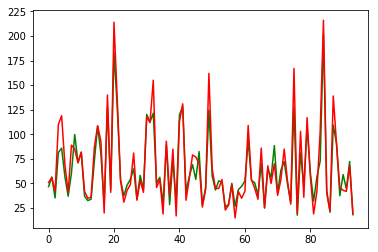

 65%|██████▍   | 22/34 [03:08<01:42,  8.56s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:139.088	val-gamma-nloglik:132.252	train-sMAPE:1.95322	val-sMAPE:1.95178
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.1046	val-gamma-nloglik:5.09813	train-sMAPE:0.010301	val-sMAPE:0.157958
[200]	train-gamma-nloglik:5.10452	val-gamma-nloglik:5.09727	train-sMAPE:0.000435	val-sMAPE:0.155428
Stopping. Best iteration:
[195]	train-gamma-nloglik:5.10452	val-gamma-nloglik:5.09727	train-sMAPE:0.000449	val-sMAPE:0.155425



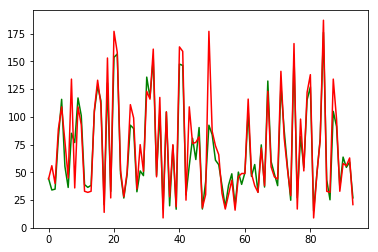

 68%|██████▊   | 23/34 [03:16<01:34,  8.56s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:118.08	val-gamma-nloglik:113.602	train-sMAPE:1.94954	val-sMAPE:1.94909
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.97641	val-gamma-nloglik:4.99243	train-sMAPE:0.011878	val-sMAPE:0.176327
[200]	train-gamma-nloglik:4.9763	val-gamma-nloglik:4.99199	train-sMAPE:0.000698	val-sMAPE:0.174097
Stopping. Best iteration:
[221]	train-gamma-nloglik:4.9763	val-gamma-nloglik:4.99199	train-sMAPE:0.000453	val-sMAPE:0.174067



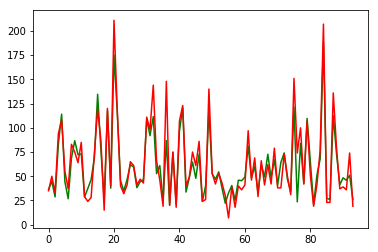

 71%|███████   | 24/34 [03:25<01:25,  8.57s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:130.548	val-gamma-nloglik:125.028	train-sMAPE:1.95652	val-sMAPE:1.95792
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.10278	val-gamma-nloglik:5.11194	train-sMAPE:0.009627	val-sMAPE:0.130712
[200]	train-gamma-nloglik:5.10271	val-gamma-nloglik:5.11143	train-sMAPE:0.00046	val-sMAPE:0.128753
Stopping. Best iteration:
[211]	train-gamma-nloglik:5.10271	val-gamma-nloglik:5.11143	train-sMAPE:0.000429	val-sMAPE:0.12874



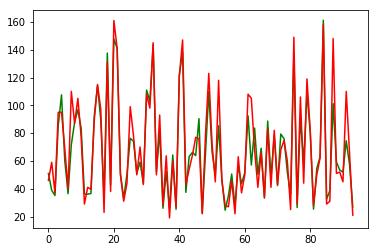

 74%|███████▎  | 25/34 [03:33<01:17,  8.56s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:124.38	val-gamma-nloglik:118.116	train-sMAPE:1.94771	val-sMAPE:1.9481
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.98865	val-gamma-nloglik:4.9911	train-sMAPE:0.014156	val-sMAPE:0.181789
[200]	train-gamma-nloglik:4.9885	val-gamma-nloglik:4.9901	train-sMAPE:0.000564	val-sMAPE:0.177838
Stopping. Best iteration:
[217]	train-gamma-nloglik:4.9885	val-gamma-nloglik:4.99009	train-sMAPE:0.000393	val-sMAPE:0.177814



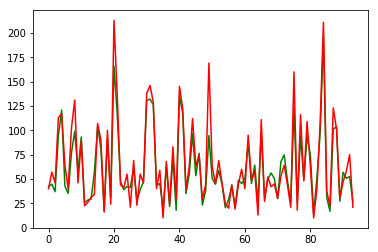

 76%|███████▋  | 26/34 [03:42<01:08,  8.57s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:124.957	val-gamma-nloglik:121.124	train-sMAPE:1.95433	val-sMAPE:1.95643
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.05907	val-gamma-nloglik:5.07659	train-sMAPE:0.012932	val-sMAPE:0.151004
[200]	train-gamma-nloglik:5.05895	val-gamma-nloglik:5.07602	train-sMAPE:0.000805	val-sMAPE:0.147816
Stopping. Best iteration:
[233]	train-gamma-nloglik:5.05895	val-gamma-nloglik:5.076	train-sMAPE:0.000421	val-sMAPE:0.147782



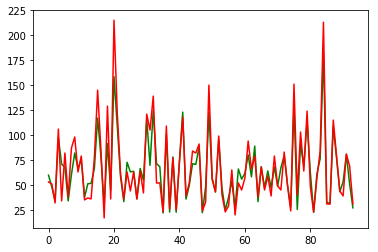

 79%|███████▉  | 27/34 [03:52<01:00,  8.60s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:136.079	val-gamma-nloglik:126.011	train-sMAPE:1.94745	val-sMAPE:1.94194
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.07456	val-gamma-nloglik:5.05573	train-sMAPE:0.013208	val-sMAPE:0.184013
[200]	train-gamma-nloglik:5.07443	val-gamma-nloglik:5.05463	train-sMAPE:0.00059	val-sMAPE:0.179196
Stopping. Best iteration:
[233]	train-gamma-nloglik:5.07443	val-gamma-nloglik:5.05462	train-sMAPE:0.000409	val-sMAPE:0.179144



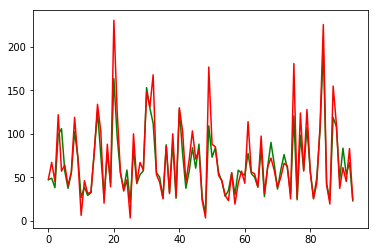

 82%|████████▏ | 28/34 [04:01<00:51,  8.62s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:127.404	val-gamma-nloglik:117.805	train-sMAPE:1.95421	val-sMAPE:1.95414
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.07074	val-gamma-nloglik:5.04348	train-sMAPE:0.010192	val-sMAPE:0.146393
[200]	train-gamma-nloglik:5.07066	val-gamma-nloglik:5.04296	train-sMAPE:0.000552	val-sMAPE:0.144632
Stopping. Best iteration:
[211]	train-gamma-nloglik:5.07066	val-gamma-nloglik:5.04296	train-sMAPE:0.000454	val-sMAPE:0.144617



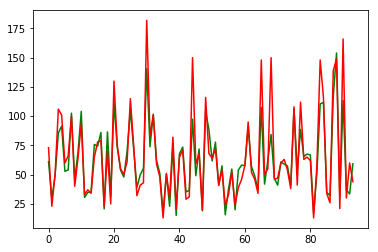

 85%|████████▌ | 29/34 [04:10<00:43,  8.62s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:111.469	val-gamma-nloglik:108.503	train-sMAPE:1.95043	val-sMAPE:1.9511
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.96033	val-gamma-nloglik:4.96479	train-sMAPE:0.00828	val-sMAPE:0.116394
[200]	train-gamma-nloglik:4.96028	val-gamma-nloglik:4.96437	train-sMAPE:0.000414	val-sMAPE:0.113231
Stopping. Best iteration:
[185]	train-gamma-nloglik:4.96028	val-gamma-nloglik:4.96438	train-sMAPE:0.000465	val-sMAPE:0.113221



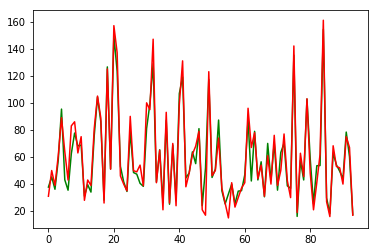

 88%|████████▊ | 30/34 [04:18<00:34,  8.62s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:109.382	val-gamma-nloglik:106.812	train-sMAPE:1.87262	val-sMAPE:1.90136
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.61216	val-gamma-nloglik:4.80126	train-sMAPE:0.011673	val-sMAPE:0.218403
[200]	train-gamma-nloglik:4.61205	val-gamma-nloglik:4.79985	train-sMAPE:0.000659	val-sMAPE:0.213694
Stopping. Best iteration:
[220]	train-gamma-nloglik:4.61205	val-gamma-nloglik:4.79982	train-sMAPE:0.000376	val-sMAPE:0.213615



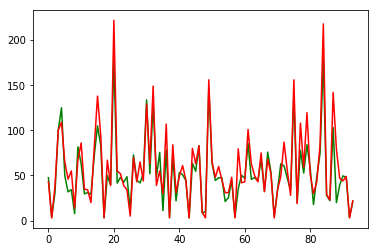

 91%|█████████ | 31/34 [04:28<00:25,  8.66s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:130.818	val-gamma-nloglik:127.265	train-sMAPE:1.9579	val-sMAPE:1.95626
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.13468	val-gamma-nloglik:5.13283	train-sMAPE:0.010505	val-sMAPE:0.146414
[200]	train-gamma-nloglik:5.13459	val-gamma-nloglik:5.13261	train-sMAPE:0.000749	val-sMAPE:0.144813
Stopping. Best iteration:
[220]	train-gamma-nloglik:5.13459	val-gamma-nloglik:5.13261	train-sMAPE:0.000512	val-sMAPE:0.144767



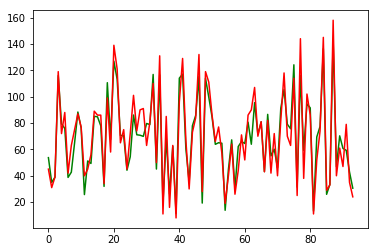

 94%|█████████▍| 32/34 [04:37<00:17,  8.66s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:128.221	val-gamma-nloglik:122.739	train-sMAPE:1.95651	val-sMAPE:1.95552
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.0895	val-gamma-nloglik:5.08976	train-sMAPE:0.011467	val-sMAPE:0.163299
[200]	train-gamma-nloglik:5.0894	val-gamma-nloglik:5.08902	train-sMAPE:0.000458	val-sMAPE:0.16062
Stopping. Best iteration:
[209]	train-gamma-nloglik:5.0894	val-gamma-nloglik:5.08901	train-sMAPE:0.000406	val-sMAPE:0.160599



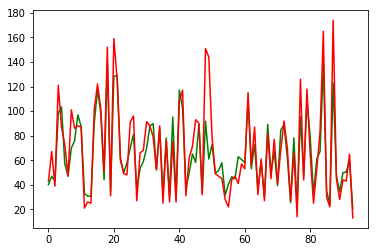

 97%|█████████▋| 33/34 [04:45<00:08,  8.65s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:103.758	val-gamma-nloglik:103.543	train-sMAPE:1.87978	val-sMAPE:1.90836
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.56683	val-gamma-nloglik:4.84016	train-sMAPE:0.017382	val-sMAPE:0.347296
[200]	train-gamma-nloglik:4.56659	val-gamma-nloglik:4.83848	train-sMAPE:0.00097	val-sMAPE:0.343145
Stopping. Best iteration:
[227]	train-gamma-nloglik:4.56659	val-gamma-nloglik:4.83848	train-sMAPE:0.000539	val-sMAPE:0.34309



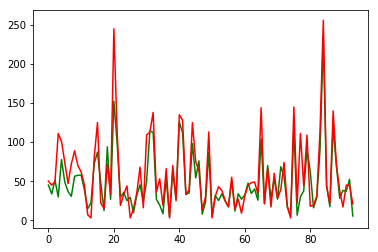

100%|██████████| 34/34 [04:54<00:00,  8.67s/it]


In [155]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+36*i:12093+36*(i+1)],train_data[:,-117:-102]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+36*i:12093+36*(i+1)],val_data[:,-117:-102]),axis = 1)
    trainY = train_data[:, -102+3*i]
    valY = val_data[:, -102+3*i]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
#     'tree_method':'hist',
    'booster': 'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
    #     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst ,xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/bj_mean_std/'+ str(i) +'_PM2.5.model') # 用于存储训练出的模型

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

i = 3
trainX = np.concatenate((beijing_train[:,2*i:2*(i+1)],beijing_train[:,68:12093],beijing_train[:,12093+12*i:12093+12*(i+1)],beijing_train[:,-117:-116],beijing_train[:,-115:-102]),axis = 1)
trainY = beijing_train[:, -102+3*i]
para = {'max_depth':range(1,10,2),'min_child_weight':range(1,10,2)}
XGB_model = GridSearchCV(XGBRegressor(colsample_bylevel=0.5, colsample_bytree=0.5,
       gamma=0,  max_delta_step=0, max_depth=8,
       min_child_weight=1,learning_rate=0.1, missing=None, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True,n_estimator=100, subsample=1),
        scoring='neg_mean_absolute_error',param_grid=para,cv=5,n_jobs=-1)
XGB_model.fit(trainX, trainY)
XGB_model.grid_scores_, XGB_model.best_params_, XGB_model.best_score_  

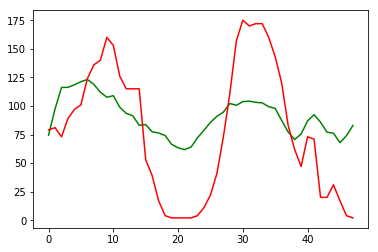

In [591]:
from sklearn.ensemble import RandomForestRegressor

i = 3
trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+36*i:12093+36*(i+1)],train_data[:,-117:-102]),axis = 1)
valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+36*i:12093+36*(i+1)],val_data[:,-117:-102]),axis = 1)
trainY = train_data[:, -102+3*i+2]
valY = val_data[:, -102+3*i+2]
model = RandomForestRegressor( max_depth=4, n_jobs=-1,criterion='mae',n_estimators=200,max_features='sqrt')
model.fit(trainX, trainY)
plt.plot(model.predict(valX),'g')
plt.plot(valY,'r')
plt.show()

In [595]:
print(sorted(model.feature_importances_,reverse=True))

[0.006212404100312339, 0.0061319477403558, 0.005797194319279957, 0.005088904818007155, 0.004983439946497434, 0.004905735858214074, 0.004723587904614835, 0.00459578807434196, 0.004586664364365873, 0.004473809960111453, 0.004425076703308892, 0.004273843198206174, 0.004065871624086534, 0.003979188175090222, 0.003978346281569813, 0.003756980764372737, 0.003611575517159277, 0.003588265383645442, 0.00346893774458607, 0.003407632393431371, 0.0033591448641713943, 0.0033376202846836676, 0.003267107173775472, 0.0032482607542909637, 0.003248042679588481, 0.003208802665903826, 0.0031947501618879628, 0.003184861864801547, 0.0031726369975229344, 0.003158246243681602, 0.0030657496381391726, 0.003044813999217919, 0.0030097287728726354, 0.0030079764513457536, 0.002985309224974304, 0.0029658965986726626, 0.0029464735467667146, 0.0028891810733690224, 0.0028874941587894607, 0.002875136218962767, 0.00286359633107648, 0.0028268477095896357, 0.002818532099999341, 0.002808123372092537, 0.002803803088792524, 0

# PM10

  0%|          | 0/34 [00:00<?, ?it/s]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:179.054	val-gamma-nloglik:182.334	train-sMAPE:1.97323	val-sMAPE:1.97292
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.50861	val-gamma-nloglik:5.52741	train-sMAPE:0.012596	val-sMAPE:0.10816
[200]	train-gamma-nloglik:5.50848	val-gamma-nloglik:5.52696	train-sMAPE:0.000597	val-sMAPE:0.104019
Stopping. Best iteration:
[218]	train-gamma-nloglik:5.50848	val-gamma-nloglik:5.52696	train-sMAPE:0.000428	val-sMAPE:0.104009



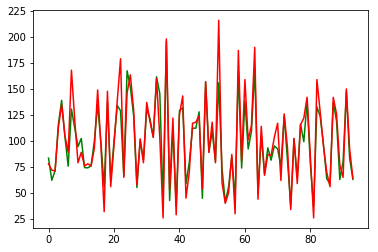

  3%|▎         | 1/34 [00:08<04:43,  8.59s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:223.31	val-gamma-nloglik:226.889	train-sMAPE:1.97248	val-sMAPE:1.97387
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.66147	val-gamma-nloglik:5.81671	train-sMAPE:0.020311	val-sMAPE:0.21727
[200]	train-gamma-nloglik:5.6611	val-gamma-nloglik:5.81681	train-sMAPE:0.00081	val-sMAPE:0.212004
Stopping. Best iteration:
[225]	train-gamma-nloglik:5.6611	val-gamma-nloglik:5.81679	train-sMAPE:0.000427	val-sMAPE:0.211971



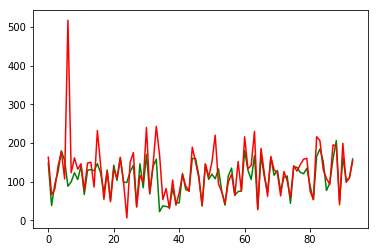

  6%|▌         | 2/34 [00:17<04:37,  8.68s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:222.521	val-gamma-nloglik:219.751	train-sMAPE:1.97286	val-sMAPE:1.96799
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.663	val-gamma-nloglik:5.64684	train-sMAPE:0.011493	val-sMAPE:0.133263
[200]	train-gamma-nloglik:5.6629	val-gamma-nloglik:5.64633	train-sMAPE:0.000435	val-sMAPE:0.129886
Stopping. Best iteration:
[207]	train-gamma-nloglik:5.6629	val-gamma-nloglik:5.64633	train-sMAPE:0.000407	val-sMAPE:0.129877



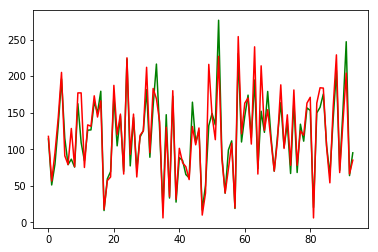

  9%|▉         | 3/34 [00:25<04:25,  8.56s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:227.103	val-gamma-nloglik:219.365	train-sMAPE:1.97923	val-sMAPE:1.97006
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.75704	val-gamma-nloglik:5.74544	train-sMAPE:0.012942	val-sMAPE:0.177695
[200]	train-gamma-nloglik:5.75691	val-gamma-nloglik:5.74514	train-sMAPE:0.000515	val-sMAPE:0.17525
Stopping. Best iteration:
[218]	train-gamma-nloglik:5.75691	val-gamma-nloglik:5.74513	train-sMAPE:0.000414	val-sMAPE:0.175233



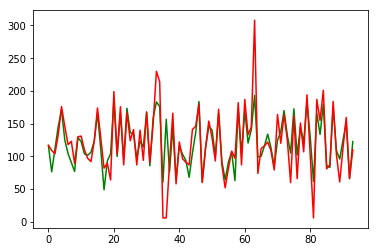

 12%|█▏        | 4/34 [00:34<04:16,  8.56s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:154.252	val-gamma-nloglik:152.818	train-sMAPE:1.96283	val-sMAPE:1.96309
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.28661	val-gamma-nloglik:5.29662	train-sMAPE:0.012681	val-sMAPE:0.144195
[200]	train-gamma-nloglik:5.28648	val-gamma-nloglik:5.29585	train-sMAPE:0.000425	val-sMAPE:0.140212
Stopping. Best iteration:
[207]	train-gamma-nloglik:5.28648	val-gamma-nloglik:5.29585	train-sMAPE:0.00038	val-sMAPE:0.140206



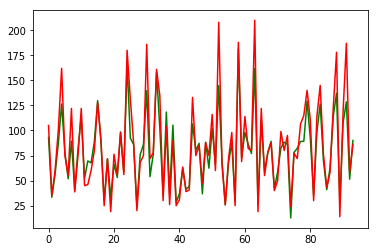

 15%|█▍        | 5/34 [00:42<04:08,  8.56s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:136.044	val-gamma-nloglik:145.765	train-sMAPE:1.96187	val-sMAPE:1.96508
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.18848	val-gamma-nloglik:5.27729	train-sMAPE:0.0098	val-sMAPE:0.107896
[200]	train-gamma-nloglik:5.18841	val-gamma-nloglik:5.27665	train-sMAPE:0.000393	val-sMAPE:0.104386
Stopping. Best iteration:
[190]	train-gamma-nloglik:5.18841	val-gamma-nloglik:5.27665	train-sMAPE:0.000439	val-sMAPE:0.104378



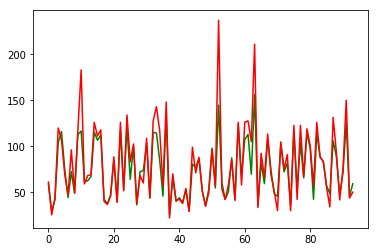

 18%|█▊        | 6/34 [00:50<03:57,  8.47s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:168.74	val-gamma-nloglik:169.793	train-sMAPE:1.9711	val-sMAPE:1.97137
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.45422	val-gamma-nloglik:5.48432	train-sMAPE:0.010058	val-sMAPE:0.134602
[200]	train-gamma-nloglik:5.45414	val-gamma-nloglik:5.48364	train-sMAPE:0.000409	val-sMAPE:0.130523
Stopping. Best iteration:
[200]	train-gamma-nloglik:5.45414	val-gamma-nloglik:5.48364	train-sMAPE:0.000409	val-sMAPE:0.130523



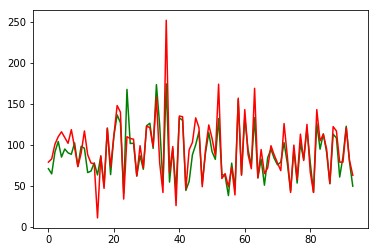

 21%|██        | 7/34 [00:58<03:46,  8.41s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:234.295	val-gamma-nloglik:234.359	train-sMAPE:1.97947	val-sMAPE:1.9791
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.77729	val-gamma-nloglik:5.77672	train-sMAPE:0.012436	val-sMAPE:0.120832
[200]	train-gamma-nloglik:5.77716	val-gamma-nloglik:5.77581	train-sMAPE:0.000499	val-sMAPE:0.11746
Stopping. Best iteration:
[212]	train-gamma-nloglik:5.77716	val-gamma-nloglik:5.77581	train-sMAPE:0.000407	val-sMAPE:0.117446



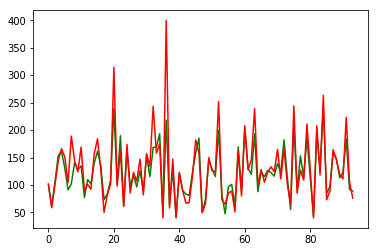

 24%|██▎       | 8/34 [01:07<03:38,  8.41s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:236.094	val-gamma-nloglik:249.552	train-sMAPE:1.97958	val-sMAPE:1.98162
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.78927	val-gamma-nloglik:5.87154	train-sMAPE:0.012334	val-sMAPE:0.110102
[200]	train-gamma-nloglik:5.78913	val-gamma-nloglik:5.8711	train-sMAPE:0.000458	val-sMAPE:0.106735
Stopping. Best iteration:
[208]	train-gamma-nloglik:5.78913	val-gamma-nloglik:5.8711	train-sMAPE:0.000415	val-sMAPE:0.106732



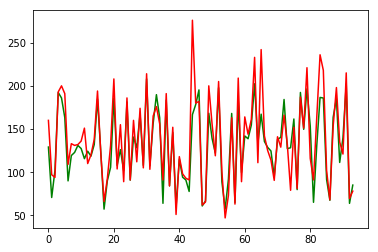

 26%|██▋       | 9/34 [01:15<03:30,  8.41s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:208.76	val-gamma-nloglik:218.085	train-sMAPE:1.97305	val-sMAPE:1.97428
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.62132	val-gamma-nloglik:5.69881	train-sMAPE:0.011771	val-sMAPE:0.141386
[200]	train-gamma-nloglik:5.62121	val-gamma-nloglik:5.69786	train-sMAPE:0.000479	val-sMAPE:0.136662
Stopping. Best iteration:
[211]	train-gamma-nloglik:5.62121	val-gamma-nloglik:5.69786	train-sMAPE:0.000414	val-sMAPE:0.136645



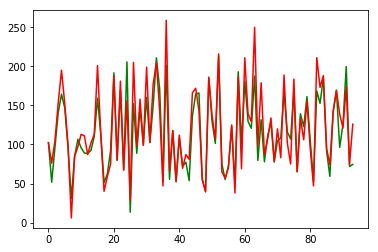

 29%|██▉       | 10/34 [01:24<03:21,  8.41s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:219.23	val-gamma-nloglik:223.102	train-sMAPE:1.97661	val-sMAPE:1.97762
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.68589	val-gamma-nloglik:5.73581	train-sMAPE:0.015308	val-sMAPE:0.131991
[200]	train-gamma-nloglik:5.68569	val-gamma-nloglik:5.73526	train-sMAPE:0.000869	val-sMAPE:0.128104
Stopping. Best iteration:
[233]	train-gamma-nloglik:5.68569	val-gamma-nloglik:5.73526	train-sMAPE:0.000451	val-sMAPE:0.128069



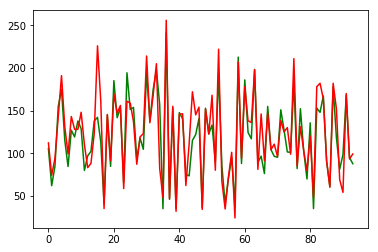

 32%|███▏      | 11/34 [01:33<03:14,  8.47s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:177.13	val-gamma-nloglik:175.042	train-sMAPE:1.97125	val-sMAPE:1.96947
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.48426	val-gamma-nloglik:5.48675	train-sMAPE:0.013032	val-sMAPE:0.125186
[200]	train-gamma-nloglik:5.4841	val-gamma-nloglik:5.48586	train-sMAPE:0.000577	val-sMAPE:0.121903
Stopping. Best iteration:
[208]	train-gamma-nloglik:5.4841	val-gamma-nloglik:5.48586	train-sMAPE:0.00048	val-sMAPE:0.12189



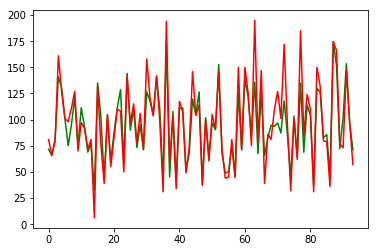

 35%|███▌      | 12/34 [01:41<03:06,  8.47s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:195.382	val-gamma-nloglik:189.978	train-sMAPE:1.96886	val-sMAPE:1.96578
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.51718	val-gamma-nloglik:5.52468	train-sMAPE:0.017697	val-sMAPE:0.215116
[200]	train-gamma-nloglik:5.51692	val-gamma-nloglik:5.52273	train-sMAPE:0.00103	val-sMAPE:0.20974
[300]	train-gamma-nloglik:5.51692	val-gamma-nloglik:5.5227	train-sMAPE:0.000414	val-sMAPE:0.209597
Stopping. Best iteration:
[269]	train-gamma-nloglik:5.51692	val-gamma-nloglik:5.5227	train-sMAPE:0.000414	val-sMAPE:0.209597



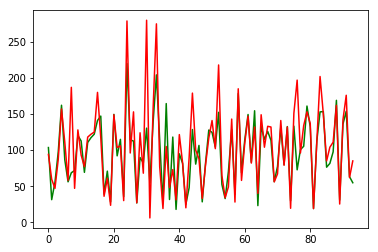

 38%|███▊      | 13/34 [01:51<03:00,  8.57s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:236.081	val-gamma-nloglik:256.146	train-sMAPE:1.97409	val-sMAPE:1.97668
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.71723	val-gamma-nloglik:5.85858	train-sMAPE:0.01478	val-sMAPE:0.172481
[200]	train-gamma-nloglik:5.71707	val-gamma-nloglik:5.85759	train-sMAPE:0.000624	val-sMAPE:0.169267
Stopping. Best iteration:
[228]	train-gamma-nloglik:5.71706	val-gamma-nloglik:5.85758	train-sMAPE:0.000419	val-sMAPE:0.169226



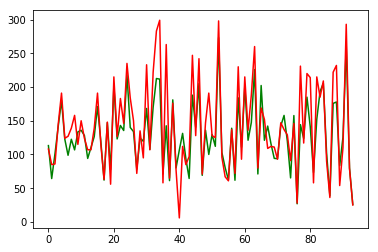

 41%|████      | 14/34 [02:00<02:51,  8.59s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:202.958	val-gamma-nloglik:195.882	train-sMAPE:1.97413	val-sMAPE:1.97498
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.59826	val-gamma-nloglik:5.60183	train-sMAPE:0.014665	val-sMAPE:0.111536
[200]	train-gamma-nloglik:5.59809	val-gamma-nloglik:5.60146	train-sMAPE:0.000503	val-sMAPE:0.107684
Stopping. Best iteration:
[231]	train-gamma-nloglik:5.59809	val-gamma-nloglik:5.60146	train-sMAPE:0.000386	val-sMAPE:0.107664



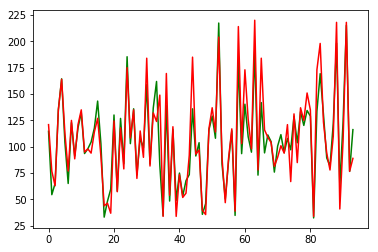

 44%|████▍     | 15/34 [02:09<02:43,  8.63s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:174.094	val-gamma-nloglik:174.081	train-sMAPE:1.96787	val-sMAPE:1.96952
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.43888	val-gamma-nloglik:5.46205	train-sMAPE:0.010288	val-sMAPE:0.134068
[200]	train-gamma-nloglik:5.43879	val-gamma-nloglik:5.4615	train-sMAPE:0.000423	val-sMAPE:0.129797
Stopping. Best iteration:
[230]	train-gamma-nloglik:5.43879	val-gamma-nloglik:5.4615	train-sMAPE:0.000393	val-sMAPE:0.129777



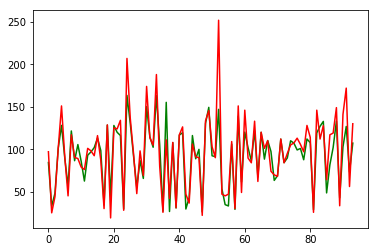

 47%|████▋     | 16/34 [02:17<02:35,  8.62s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:153.181	val-gamma-nloglik:149.707	train-sMAPE:1.96286	val-sMAPE:1.96103
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.2903	val-gamma-nloglik:5.28607	train-sMAPE:0.016165	val-sMAPE:0.150429
[200]	train-gamma-nloglik:5.29008	val-gamma-nloglik:5.2852	train-sMAPE:0.000881	val-sMAPE:0.146105
Stopping. Best iteration:
[228]	train-gamma-nloglik:5.29008	val-gamma-nloglik:5.28518	train-sMAPE:0.000485	val-sMAPE:0.146052



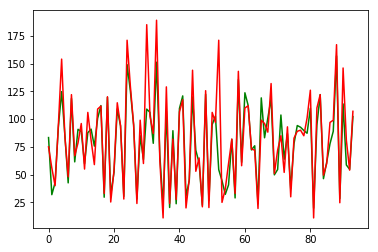

 50%|█████     | 17/34 [02:26<02:26,  8.63s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:240.931	val-gamma-nloglik:248.427	train-sMAPE:1.97966	val-sMAPE:1.98119
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.80091	val-gamma-nloglik:5.86333	train-sMAPE:0.013222	val-sMAPE:0.133648
[200]	train-gamma-nloglik:5.80077	val-gamma-nloglik:5.86275	train-sMAPE:0.000596	val-sMAPE:0.128772
Stopping. Best iteration:
[232]	train-gamma-nloglik:5.80077	val-gamma-nloglik:5.86275	train-sMAPE:0.000392	val-sMAPE:0.128749



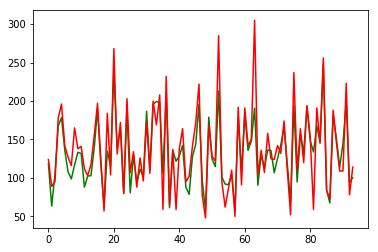

 53%|█████▎    | 18/34 [02:35<02:18,  8.66s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:192.548	val-gamma-nloglik:193.961	train-sMAPE:1.97204	val-sMAPE:1.9748
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.55209	val-gamma-nloglik:5.5969	train-sMAPE:0.014599	val-sMAPE:0.12712
[200]	train-gamma-nloglik:5.55192	val-gamma-nloglik:5.59626	train-sMAPE:0.000467	val-sMAPE:0.123063
Stopping. Best iteration:
[205]	train-gamma-nloglik:5.55192	val-gamma-nloglik:5.59627	train-sMAPE:0.000404	val-sMAPE:0.123059



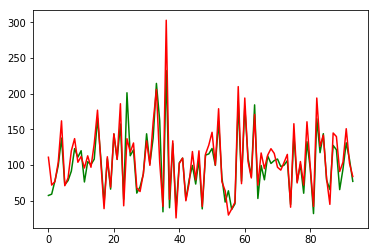

 56%|█████▌    | 19/34 [02:44<02:09,  8.63s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:202.384	val-gamma-nloglik:200.329	train-sMAPE:1.972	val-sMAPE:1.97332
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.57384	val-gamma-nloglik:5.59773	train-sMAPE:0.012444	val-sMAPE:0.140435
[200]	train-gamma-nloglik:5.57371	val-gamma-nloglik:5.59708	train-sMAPE:0.00062	val-sMAPE:0.136735
Stopping. Best iteration:
[162]	train-gamma-nloglik:5.57372	val-gamma-nloglik:5.59706	train-sMAPE:0.001555	val-sMAPE:0.136647



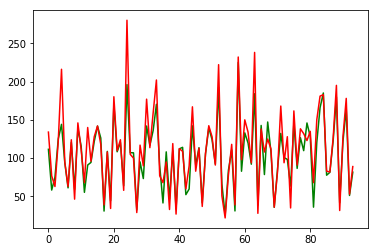

 59%|█████▉    | 20/34 [02:51<01:59,  8.56s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:135.884	val-gamma-nloglik:135.951	train-sMAPE:1.9601	val-sMAPE:1.96018
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.16837	val-gamma-nloglik:5.18543	train-sMAPE:0.009365	val-sMAPE:0.124533
[200]	train-gamma-nloglik:5.1683	val-gamma-nloglik:5.18502	train-sMAPE:0.000589	val-sMAPE:0.122643
Stopping. Best iteration:
[217]	train-gamma-nloglik:5.1683	val-gamma-nloglik:5.18502	train-sMAPE:0.000433	val-sMAPE:0.122633



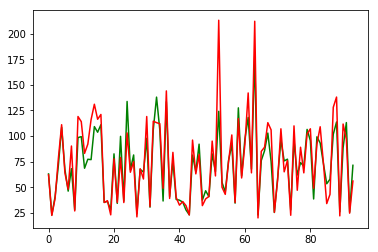

 62%|██████▏   | 21/34 [02:59<01:51,  8.55s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:199.346	val-gamma-nloglik:206.444	train-sMAPE:1.97534	val-sMAPE:1.9775
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.61115	val-gamma-nloglik:5.67862	train-sMAPE:0.011933	val-sMAPE:0.112747
[200]	train-gamma-nloglik:5.61104	val-gamma-nloglik:5.67807	train-sMAPE:0.000432	val-sMAPE:0.109096
Stopping. Best iteration:
[186]	train-gamma-nloglik:5.61104	val-gamma-nloglik:5.67807	train-sMAPE:0.000548	val-sMAPE:0.109085



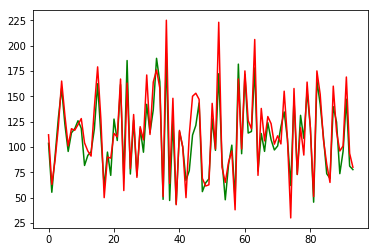

 65%|██████▍   | 22/34 [03:07<01:42,  8.52s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:193.419	val-gamma-nloglik:190.184	train-sMAPE:1.97327	val-sMAPE:1.96861
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.56632	val-gamma-nloglik:5.54596	train-sMAPE:0.01096	val-sMAPE:0.128749
[200]	train-gamma-nloglik:5.56622	val-gamma-nloglik:5.5456	train-sMAPE:0.00054	val-sMAPE:0.125503
Stopping. Best iteration:
[231]	train-gamma-nloglik:5.56622	val-gamma-nloglik:5.5456	train-sMAPE:0.000392	val-sMAPE:0.125477



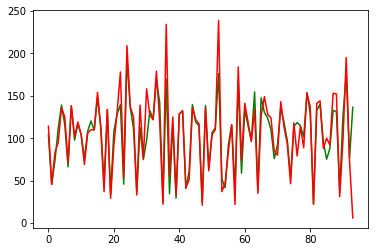

 68%|██████▊   | 23/34 [03:16<01:33,  8.53s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:179.503	val-gamma-nloglik:182.959	train-sMAPE:1.97091	val-sMAPE:1.97283
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.47383	val-gamma-nloglik:5.52803	train-sMAPE:0.010935	val-sMAPE:0.122827
[200]	train-gamma-nloglik:5.47375	val-gamma-nloglik:5.52754	train-sMAPE:0.000486	val-sMAPE:0.120348
Stopping. Best iteration:
[187]	train-gamma-nloglik:5.47375	val-gamma-nloglik:5.52754	train-sMAPE:0.000613	val-sMAPE:0.120334



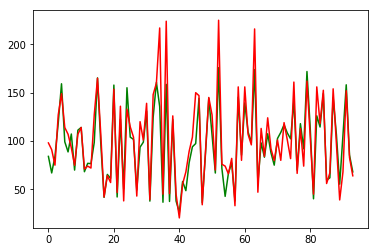

 71%|███████   | 24/34 [03:23<01:24,  8.49s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:220.172	val-gamma-nloglik:213.871	train-sMAPE:1.97636	val-sMAPE:1.96817
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.69998	val-gamma-nloglik:5.68754	train-sMAPE:0.012703	val-sMAPE:0.17547
[200]	train-gamma-nloglik:5.69985	val-gamma-nloglik:5.68689	train-sMAPE:0.000607	val-sMAPE:0.172267
Stopping. Best iteration:
[221]	train-gamma-nloglik:5.69985	val-gamma-nloglik:5.68689	train-sMAPE:0.0004	val-sMAPE:0.172242



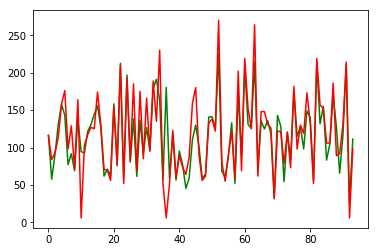

 74%|███████▎  | 25/34 [03:32<01:16,  8.49s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:190.679	val-gamma-nloglik:181.779	train-sMAPE:1.97198	val-sMAPE:1.96614
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.5374	val-gamma-nloglik:5.51278	train-sMAPE:0.015986	val-sMAPE:0.182221
Stopping. Best iteration:
[148]	train-gamma-nloglik:5.53721	val-gamma-nloglik:5.51249	train-sMAPE:0.002604	val-sMAPE:0.179199



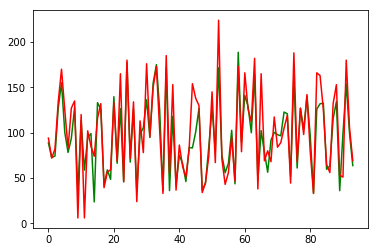

 76%|███████▋  | 26/34 [03:38<01:07,  8.42s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:231.739	val-gamma-nloglik:232.551	train-sMAPE:1.97689	val-sMAPE:1.97513
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.73486	val-gamma-nloglik:5.78424	train-sMAPE:0.017988	val-sMAPE:0.206839
[200]	train-gamma-nloglik:5.73461	val-gamma-nloglik:5.78364	train-sMAPE:0.000952	val-sMAPE:0.203194
Stopping. Best iteration:
[239]	train-gamma-nloglik:5.73461	val-gamma-nloglik:5.78364	train-sMAPE:0.000417	val-sMAPE:0.203143



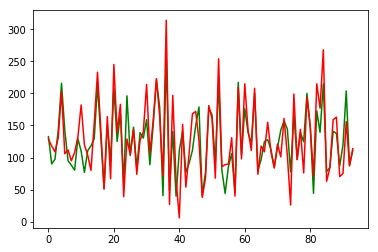

 79%|███████▉  | 27/34 [03:47<00:59,  8.44s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:202.812	val-gamma-nloglik:206.723	train-sMAPE:1.97612	val-sMAPE:1.975
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.62915	val-gamma-nloglik:5.64827	train-sMAPE:0.012995	val-sMAPE:0.113561
[200]	train-gamma-nloglik:5.62901	val-gamma-nloglik:5.64763	train-sMAPE:0.000661	val-sMAPE:0.109792
Stopping. Best iteration:
[166]	train-gamma-nloglik:5.62901	val-gamma-nloglik:5.64763	train-sMAPE:0.001333	val-sMAPE:0.109742



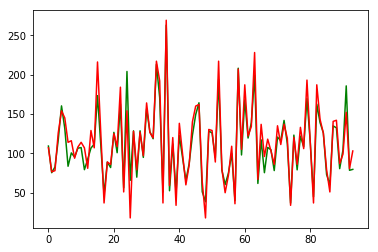

 82%|████████▏ | 28/34 [03:54<00:50,  8.39s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:193.644	val-gamma-nloglik:189.335	train-sMAPE:1.97037	val-sMAPE:1.97041
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.53805	val-gamma-nloglik:5.52482	train-sMAPE:0.01209	val-sMAPE:0.140811
[200]	train-gamma-nloglik:5.53793	val-gamma-nloglik:5.52387	train-sMAPE:0.000525	val-sMAPE:0.135854
Stopping. Best iteration:
[230]	train-gamma-nloglik:5.53793	val-gamma-nloglik:5.52386	train-sMAPE:0.000433	val-sMAPE:0.135827



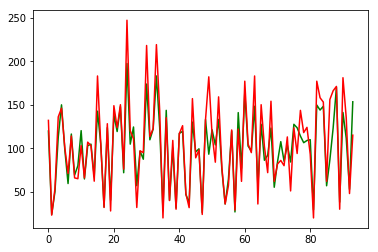

 85%|████████▌ | 29/34 [04:03<00:41,  8.40s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:136.926	val-gamma-nloglik:147.696	train-sMAPE:1.96186	val-sMAPE:1.96758
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.21903	val-gamma-nloglik:5.32209	train-sMAPE:0.009117	val-sMAPE:0.107155
[200]	train-gamma-nloglik:5.21897	val-gamma-nloglik:5.32167	train-sMAPE:0.000416	val-sMAPE:0.104687
Stopping. Best iteration:
[197]	train-gamma-nloglik:5.21897	val-gamma-nloglik:5.32167	train-sMAPE:0.000428	val-sMAPE:0.104682



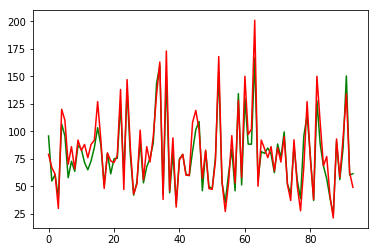

 88%|████████▊ | 30/34 [04:11<00:33,  8.38s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:190.32	val-gamma-nloglik:194.227	train-sMAPE:1.97251	val-sMAPE:1.97224
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.55057	val-gamma-nloglik:5.61453	train-sMAPE:0.01602	val-sMAPE:0.175288
[200]	train-gamma-nloglik:5.55037	val-gamma-nloglik:5.6139	train-sMAPE:0.000758	val-sMAPE:0.172348
Stopping. Best iteration:
[210]	train-gamma-nloglik:5.55037	val-gamma-nloglik:5.61389	train-sMAPE:0.000601	val-sMAPE:0.172301



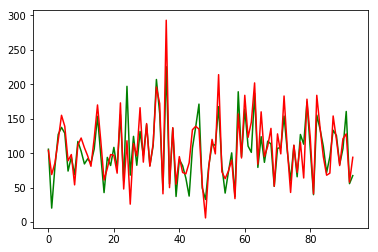

 91%|█████████ | 31/34 [04:19<00:25,  8.38s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:183.246	val-gamma-nloglik:190.122	train-sMAPE:1.97391	val-sMAPE:1.9751
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.53591	val-gamma-nloglik:5.5953	train-sMAPE:0.011523	val-sMAPE:0.117745
[200]	train-gamma-nloglik:5.5358	val-gamma-nloglik:5.59506	train-sMAPE:0.000506	val-sMAPE:0.115145
Stopping. Best iteration:
[233]	train-gamma-nloglik:5.5358	val-gamma-nloglik:5.59506	train-sMAPE:0.000434	val-sMAPE:0.11513



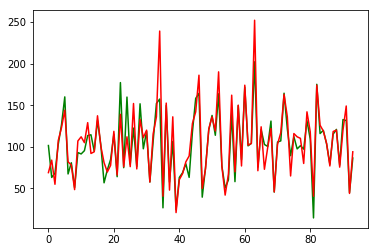

 94%|█████████▍| 32/34 [04:28<00:16,  8.39s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:192.131	val-gamma-nloglik:193.831	train-sMAPE:1.97468	val-sMAPE:1.97591
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.58704	val-gamma-nloglik:5.62383	train-sMAPE:0.012737	val-sMAPE:0.140594
[200]	train-gamma-nloglik:5.58692	val-gamma-nloglik:5.62308	train-sMAPE:0.000484	val-sMAPE:0.136513
Stopping. Best iteration:
[215]	train-gamma-nloglik:5.58692	val-gamma-nloglik:5.62308	train-sMAPE:0.000409	val-sMAPE:0.136498



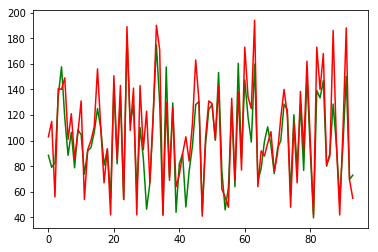

 97%|█████████▋| 33/34 [04:37<00:08,  8.40s/it]

(218, 12078)
(94, 12078)
[0]	train-gamma-nloglik:156.733	val-gamma-nloglik:158.197	train-sMAPE:1.96874	val-sMAPE:1.96882
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.36638	val-gamma-nloglik:5.3853	train-sMAPE:0.010304	val-sMAPE:0.111943
[200]	train-gamma-nloglik:5.3663	val-gamma-nloglik:5.38472	train-sMAPE:0.000394	val-sMAPE:0.108605
Stopping. Best iteration:
[190]	train-gamma-nloglik:5.3663	val-gamma-nloglik:5.38472	train-sMAPE:0.000406	val-sMAPE:0.108602



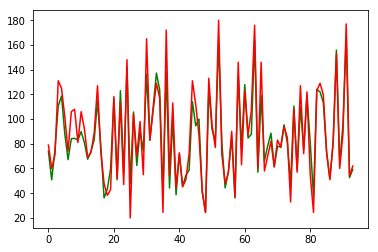

100%|██████████| 34/34 [04:44<00:00,  8.38s/it]


In [156]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+36*i:12093+36*(i+1)],train_data[:,-117:-102]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+36*i:12093+36*(i+1)],val_data[:,-117:-102]),axis = 1)
    trainY = train_data[:, -102+3*i+1]
    valY = val_data[:, -102+3*i+1]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
#     'tree_method':'hist',
    'booster': 'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
    #     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/bj_mean_std/'+ str(i) +'_PM10.model') # 用于存储训练出的模型

# O3 小维度

  0%|          | 0/34 [00:00<?, ?it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:170.328	val-gamma-nloglik:167.041	train-sMAPE:1.88469	val-sMAPE:1.86927
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.20146	val-gamma-nloglik:5.39129	train-sMAPE:0.417291	val-sMAPE:0.518033
Stopping. Best iteration:
[133]	train-gamma-nloglik:5.16976	val-gamma-nloglik:5.38403	train-sMAPE:0.374421	val-sMAPE:0.503771



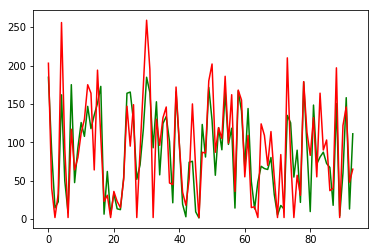

  3%|▎         | 1/34 [00:00<00:15,  2.12it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:166.239	val-gamma-nloglik:151.857	train-sMAPE:1.90567	val-sMAPE:1.90078
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.21125	val-gamma-nloglik:5.32292	train-sMAPE:0.372298	val-sMAPE:0.527376
[200]	train-gamma-nloglik:5.16122	val-gamma-nloglik:5.3539	train-sMAPE:0.289588	val-sMAPE:0.518644
Stopping. Best iteration:
[170]	train-gamma-nloglik:5.17348	val-gamma-nloglik:5.33502	train-sMAPE:0.311187	val-sMAPE:0.516674



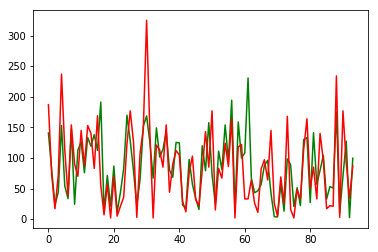

  6%|▌         | 2/34 [00:00<00:14,  2.18it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:176.718	val-gamma-nloglik:166.199	train-sMAPE:1.89292	val-sMAPE:1.88746
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.25753	val-gamma-nloglik:6.62845	train-sMAPE:0.44733	val-sMAPE:0.596692
Stopping. Best iteration:
[103]	train-gamma-nloglik:5.25445	val-gamma-nloglik:6.60074	train-sMAPE:0.44103	val-sMAPE:0.596392



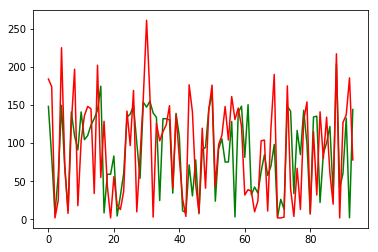

  9%|▉         | 3/34 [00:01<00:12,  2.39it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:161.102	val-gamma-nloglik:164.294	train-sMAPE:1.87668	val-sMAPE:1.90739
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.11755	val-gamma-nloglik:5.39777	train-sMAPE:0.382538	val-sMAPE:0.468479
Stopping. Best iteration:
[121]	train-gamma-nloglik:5.0987	val-gamma-nloglik:5.4151	train-sMAPE:0.361387	val-sMAPE:0.464638



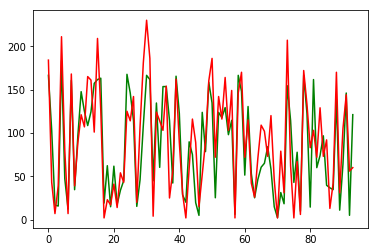

 12%|█▏        | 4/34 [00:01<00:12,  2.48it/s]

(218, 4)
(94, 4)
19.0
[0]	train-gamma-nloglik:186.121	val-gamma-nloglik:180.332	train-sMAPE:1.96782	val-sMAPE:1.96974
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.50516	val-gamma-nloglik:5.54217	train-sMAPE:0.287618	val-sMAPE:0.347073
Stopping. Best iteration:
[92]	train-gamma-nloglik:5.50988	val-gamma-nloglik:5.53819	train-sMAPE:0.296447	val-sMAPE:0.343148



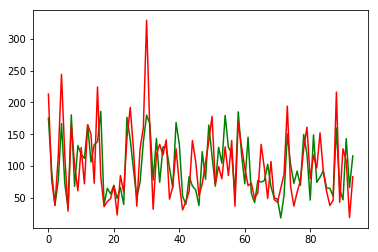

 15%|█▍        | 5/34 [00:01<00:11,  2.59it/s]

(218, 4)
(94, 4)
9.0
[0]	train-gamma-nloglik:190.722	val-gamma-nloglik:191.419	train-sMAPE:1.96037	val-sMAPE:1.96561
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.55091	val-gamma-nloglik:5.62187	train-sMAPE:0.323014	val-sMAPE:0.408568
Stopping. Best iteration:
[91]	train-gamma-nloglik:5.55758	val-gamma-nloglik:5.61855	train-sMAPE:0.337525	val-sMAPE:0.404752



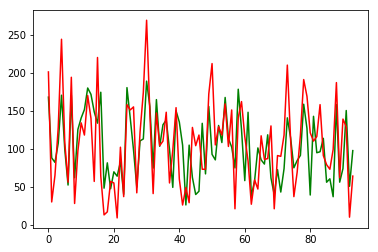

 18%|█▊        | 6/34 [00:02<00:10,  2.67it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:181.178	val-gamma-nloglik:175.978	train-sMAPE:1.93786	val-sMAPE:1.92543
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.3752	val-gamma-nloglik:5.46639	train-sMAPE:0.318031	val-sMAPE:0.442667
Stopping. Best iteration:
[136]	train-gamma-nloglik:5.35177	val-gamma-nloglik:5.47923	train-sMAPE:0.274727	val-sMAPE:0.440188



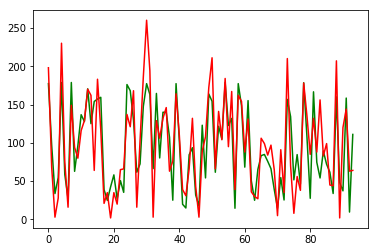

 21%|██        | 7/34 [00:02<00:10,  2.54it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:114.734	val-gamma-nloglik:122.562	train-sMAPE:1.77734	val-sMAPE:1.79573
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.54243	val-gamma-nloglik:4.97451	train-sMAPE:0.490898	val-sMAPE:0.611285
[200]	train-gamma-nloglik:4.45279	val-gamma-nloglik:5.11343	train-sMAPE:0.370397	val-sMAPE:0.589893
Stopping. Best iteration:
[177]	train-gamma-nloglik:4.46739	val-gamma-nloglik:5.09872	train-sMAPE:0.391462	val-sMAPE:0.583762



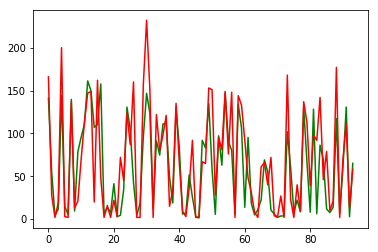

 24%|██▎       | 8/34 [00:03<00:10,  2.50it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:189.765	val-gamma-nloglik:186.788	train-sMAPE:1.92465	val-sMAPE:1.92993
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.35886	val-gamma-nloglik:5.49692	train-sMAPE:0.328941	val-sMAPE:0.398921
Stopping. Best iteration:
[123]	train-gamma-nloglik:5.3458	val-gamma-nloglik:5.50132	train-sMAPE:0.300645	val-sMAPE:0.394261



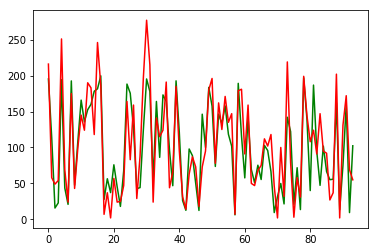

 26%|██▋       | 9/34 [00:03<00:09,  2.54it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:175.64	val-gamma-nloglik:169.761	train-sMAPE:1.9163	val-sMAPE:1.91641
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.2869	val-gamma-nloglik:5.54695	train-sMAPE:0.340244	val-sMAPE:0.463874
Stopping. Best iteration:
[123]	train-gamma-nloglik:5.27302	val-gamma-nloglik:5.59515	train-sMAPE:0.313685	val-sMAPE:0.453443



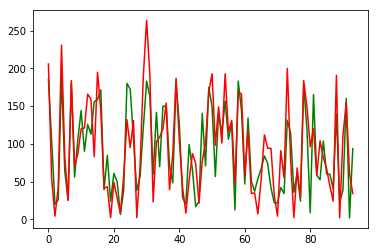

 29%|██▉       | 10/34 [00:03<00:09,  2.56it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:187.184	val-gamma-nloglik:179.894	train-sMAPE:1.9377	val-sMAPE:1.91854
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.39767	val-gamma-nloglik:5.48092	train-sMAPE:0.321297	val-sMAPE:0.457305
Stopping. Best iteration:
[142]	train-gamma-nloglik:5.37544	val-gamma-nloglik:5.48654	train-sMAPE:0.276656	val-sMAPE:0.436532



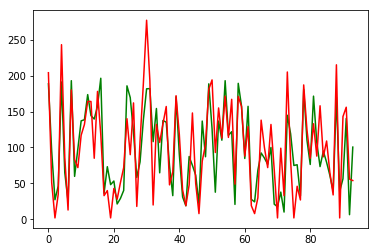

 32%|███▏      | 11/34 [00:04<00:09,  2.54it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:153.954	val-gamma-nloglik:154.447	train-sMAPE:1.89548	val-sMAPE:1.89326
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.12165	val-gamma-nloglik:5.1898	train-sMAPE:0.432604	val-sMAPE:0.440599
Stopping. Best iteration:
[130]	train-gamma-nloglik:5.09594	val-gamma-nloglik:5.21003	train-sMAPE:0.396202	val-sMAPE:0.437835



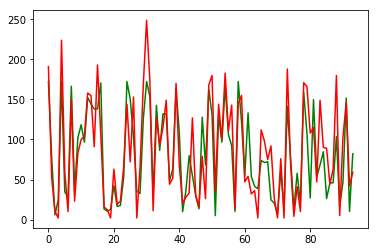

 35%|███▌      | 12/34 [00:04<00:08,  2.55it/s]

(218, 4)
(94, 4)
22.0
[0]	train-gamma-nloglik:180.533	val-gamma-nloglik:174.042	train-sMAPE:1.96895	val-sMAPE:1.96824
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.47979	val-gamma-nloglik:5.47659	train-sMAPE:0.234658	val-sMAPE:0.291333
[200]	train-gamma-nloglik:5.46345	val-gamma-nloglik:5.47009	train-sMAPE:0.17321	val-sMAPE:0.273769
[300]	train-gamma-nloglik:5.45648	val-gamma-nloglik:5.4688	train-sMAPE:0.142581	val-sMAPE:0.264748
[400]	train-gamma-nloglik:5.45171	val-gamma-nloglik:5.46764	train-sMAPE:0.116773	val-sMAPE:0.262119
Stopping. Best iteration:
[378]	train-gamma-nloglik:5.45264	val-gamma-nloglik:5.46765	train-sMAPE:0.122596	val-sMAPE:0.261219



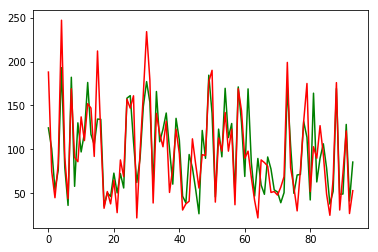

 38%|███▊      | 13/34 [00:05<00:08,  2.34it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:179.04	val-gamma-nloglik:170.184	train-sMAPE:1.94319	val-sMAPE:1.93344
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.33802	val-gamma-nloglik:5.37732	train-sMAPE:0.306044	val-sMAPE:0.425394
Stopping. Best iteration:
[125]	train-gamma-nloglik:5.32347	val-gamma-nloglik:5.37425	train-sMAPE:0.281007	val-sMAPE:0.417278



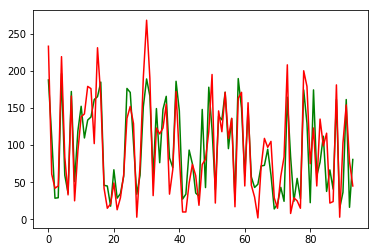

 41%|████      | 14/34 [00:05<00:08,  2.35it/s]

(218, 4)
(94, 4)
17.0
[0]	train-gamma-nloglik:185.169	val-gamma-nloglik:179.751	train-sMAPE:1.96414	val-sMAPE:1.96573
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.45934	val-gamma-nloglik:5.49678	train-sMAPE:0.281546	val-sMAPE:0.333215
Stopping. Best iteration:
[121]	train-gamma-nloglik:5.45135	val-gamma-nloglik:5.49997	train-sMAPE:0.260414	val-sMAPE:0.328067



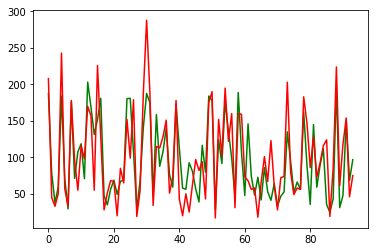

 44%|████▍     | 15/34 [00:06<00:08,  2.36it/s]

(218, 4)
(94, 4)
12.0
[0]	train-gamma-nloglik:208.256	val-gamma-nloglik:199.735	train-sMAPE:1.96371	val-sMAPE:1.9663
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.59233	val-gamma-nloglik:5.59366	train-sMAPE:0.298325	val-sMAPE:0.378163
Stopping. Best iteration:
[81]	train-gamma-nloglik:5.60396	val-gamma-nloglik:5.59377	train-sMAPE:0.323161	val-sMAPE:0.372563



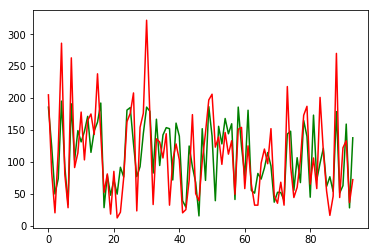

 47%|████▋     | 16/34 [00:06<00:07,  2.40it/s]

(218, 4)
(94, 4)
38.0
[0]	train-gamma-nloglik:236.298	val-gamma-nloglik:234.968	train-sMAPE:1.97889	val-sMAPE:1.97916
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.79379	val-gamma-nloglik:5.81865	train-sMAPE:0.202418	val-sMAPE:0.252989
[200]	train-gamma-nloglik:5.78083	val-gamma-nloglik:5.81569	train-sMAPE:0.148382	val-sMAPE:0.249811
Stopping. Best iteration:
[172]	train-gamma-nloglik:5.78332	val-gamma-nloglik:5.81514	train-sMAPE:0.160013	val-sMAPE:0.247127



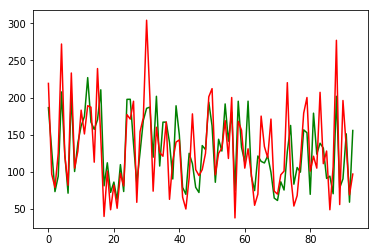

 50%|█████     | 17/34 [00:07<00:07,  2.37it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:106.032	val-gamma-nloglik:99.691	train-sMAPE:1.84758	val-sMAPE:1.86698
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.67941	val-gamma-nloglik:4.7362	train-sMAPE:0.382659	val-sMAPE:0.464969
[200]	train-gamma-nloglik:4.61332	val-gamma-nloglik:4.76438	train-sMAPE:0.283643	val-sMAPE:0.470143
Stopping. Best iteration:
[155]	train-gamma-nloglik:4.63274	val-gamma-nloglik:4.74282	train-sMAPE:0.319623	val-sMAPE:0.45648



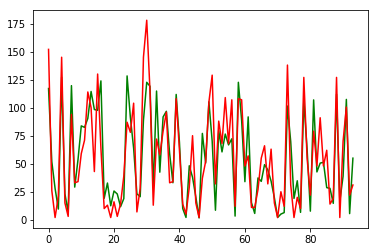

 53%|█████▎    | 18/34 [00:07<00:06,  2.36it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:152.462	val-gamma-nloglik:155.994	train-sMAPE:1.87586	val-sMAPE:1.88825
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.09722	val-gamma-nloglik:5.30459	train-sMAPE:0.415832	val-sMAPE:0.496069
[200]	train-gamma-nloglik:5.03555	val-gamma-nloglik:5.3146	train-sMAPE:0.340848	val-sMAPE:0.474746
Stopping. Best iteration:
[172]	train-gamma-nloglik:5.0487	val-gamma-nloglik:5.302	train-sMAPE:0.356307	val-sMAPE:0.467543



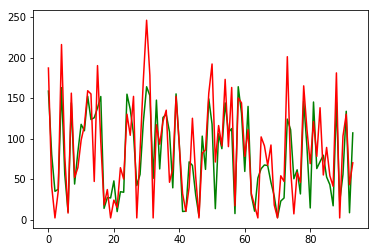

 56%|█████▌    | 19/34 [00:08<00:06,  2.32it/s]

(218, 4)
(94, 4)
5.0
[0]	train-gamma-nloglik:187.162	val-gamma-nloglik:181.065	train-sMAPE:1.95718	val-sMAPE:1.96086
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.44835	val-gamma-nloglik:5.526	train-sMAPE:0.27278	val-sMAPE:0.370051
Stopping. Best iteration:
[118]	train-gamma-nloglik:5.44131	val-gamma-nloglik:5.52871	train-sMAPE:0.25543	val-sMAPE:0.367085



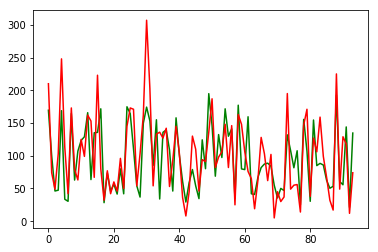

 59%|█████▉    | 20/34 [00:08<00:05,  2.33it/s]

(218, 4)
(94, 4)
5.0
[0]	train-gamma-nloglik:216.656	val-gamma-nloglik:217.796	train-sMAPE:1.96661	val-sMAPE:1.9697
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.66547	val-gamma-nloglik:5.74001	train-sMAPE:0.307677	val-sMAPE:0.363612
[200]	train-gamma-nloglik:5.63393	val-gamma-nloglik:5.74325	train-sMAPE:0.234752	val-sMAPE:0.361018
Stopping. Best iteration:
[151]	train-gamma-nloglik:5.6475	val-gamma-nloglik:5.73941	train-sMAPE:0.265961	val-sMAPE:0.358567



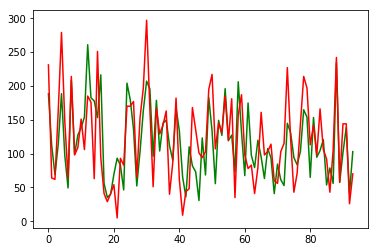

 62%|██████▏   | 21/34 [00:09<00:05,  2.30it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:149.53	val-gamma-nloglik:144.148	train-sMAPE:1.90378	val-sMAPE:1.90089
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.0909	val-gamma-nloglik:5.16932	train-sMAPE:0.344704	val-sMAPE:0.447679
Stopping. Best iteration:
[131]	train-gamma-nloglik:5.06652	val-gamma-nloglik:5.1689	train-sMAPE:0.309037	val-sMAPE:0.431408



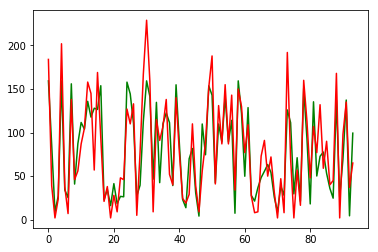

 65%|██████▍   | 22/34 [00:09<00:05,  2.31it/s]

(218, 4)
(94, 4)
4.0
[0]	train-gamma-nloglik:186.938	val-gamma-nloglik:182.833	train-sMAPE:1.94806	val-sMAPE:1.95749
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.4119	val-gamma-nloglik:5.44606	train-sMAPE:0.298483	val-sMAPE:0.331119
Stopping. Best iteration:
[109]	train-gamma-nloglik:5.40808	val-gamma-nloglik:5.4453	train-sMAPE:0.289628	val-sMAPE:0.328232



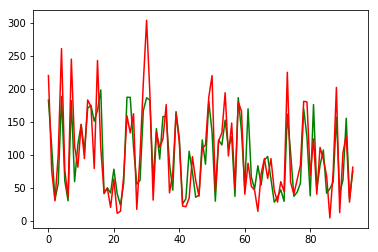

 68%|██████▊   | 23/34 [00:10<00:04,  2.26it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:141.498	val-gamma-nloglik:139.358	train-sMAPE:1.90493	val-sMAPE:1.90439
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.02745	val-gamma-nloglik:5.15463	train-sMAPE:0.326365	val-sMAPE:0.456193
[200]	train-gamma-nloglik:4.98782	val-gamma-nloglik:5.17115	train-sMAPE:0.244287	val-sMAPE:0.437744
Stopping. Best iteration:
[224]	train-gamma-nloglik:4.98239	val-gamma-nloglik:5.17427	train-sMAPE:0.231168	val-sMAPE:0.430108



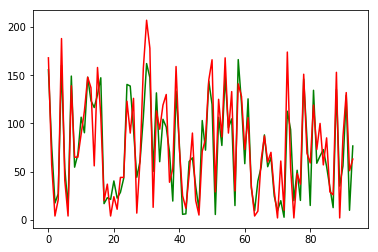

 71%|███████   | 24/34 [00:10<00:04,  2.24it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:158.34	val-gamma-nloglik:159.789	train-sMAPE:1.9191	val-sMAPE:1.91772
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.13209	val-gamma-nloglik:5.24203	train-sMAPE:0.306554	val-sMAPE:0.423438
[200]	train-gamma-nloglik:5.09079	val-gamma-nloglik:5.25391	train-sMAPE:0.222392	val-sMAPE:0.404903
Stopping. Best iteration:
[209]	train-gamma-nloglik:5.08795	val-gamma-nloglik:5.25137	train-sMAPE:0.216584	val-sMAPE:0.399917



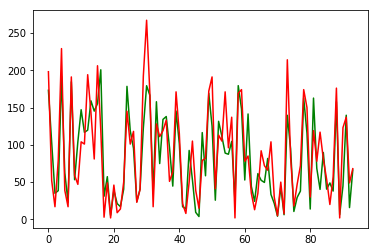

 74%|███████▎  | 25/34 [00:11<00:04,  2.22it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:162.676	val-gamma-nloglik:162.835	train-sMAPE:1.91298	val-sMAPE:1.89325
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.18393	val-gamma-nloglik:5.37752	train-sMAPE:0.377332	val-sMAPE:0.546801
Stopping. Best iteration:
[106]	train-gamma-nloglik:5.1788	val-gamma-nloglik:5.38	train-sMAPE:0.369684	val-sMAPE:0.544465



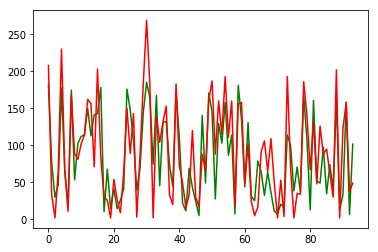

 76%|███████▋  | 26/34 [00:11<00:03,  2.24it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:159.4	val-gamma-nloglik:154.764	train-sMAPE:1.91037	val-sMAPE:1.92346
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.18916	val-gamma-nloglik:5.33915	train-sMAPE:0.332904	val-sMAPE:0.427266
Stopping. Best iteration:
[86]	train-gamma-nloglik:5.20312	val-gamma-nloglik:5.30747	train-sMAPE:0.345266	val-sMAPE:0.415972



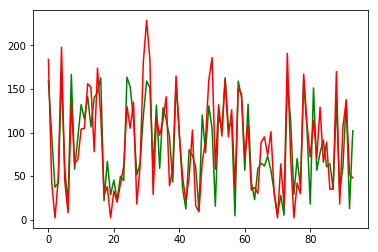

 79%|███████▉  | 27/34 [00:11<00:03,  2.27it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:135.863	val-gamma-nloglik:128.194	train-sMAPE:1.87178	val-sMAPE:1.8467
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.03544	val-gamma-nloglik:5.09049	train-sMAPE:0.444955	val-sMAPE:0.576679
Stopping. Best iteration:
[109]	train-gamma-nloglik:5.02761	val-gamma-nloglik:5.08802	train-sMAPE:0.432341	val-sMAPE:0.574354



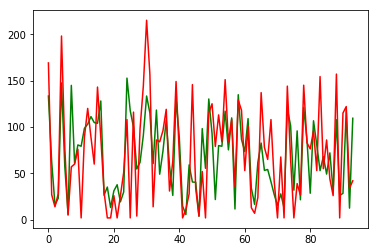

 82%|████████▏ | 28/34 [00:12<00:02,  2.28it/s]

(218, 4)
(94, 4)
8.0
[0]	train-gamma-nloglik:202.902	val-gamma-nloglik:195.151	train-sMAPE:1.95229	val-sMAPE:1.96381
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.57697	val-gamma-nloglik:5.65397	train-sMAPE:0.303907	val-sMAPE:0.39732
Stopping. Best iteration:
[83]	train-gamma-nloglik:5.59	val-gamma-nloglik:5.65458	train-sMAPE:0.326354	val-sMAPE:0.394547



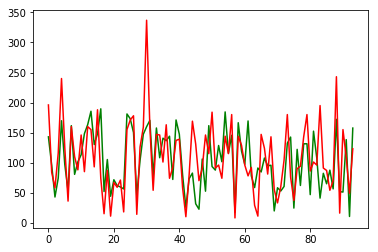

 85%|████████▌ | 29/34 [00:12<00:02,  2.31it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:175.184	val-gamma-nloglik:175.924	train-sMAPE:1.90572	val-sMAPE:1.90526
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.30761	val-gamma-nloglik:5.61722	train-sMAPE:0.370365	val-sMAPE:0.490388
Stopping. Best iteration:
[124]	train-gamma-nloglik:5.28748	val-gamma-nloglik:5.81309	train-sMAPE:0.346289	val-sMAPE:0.484417



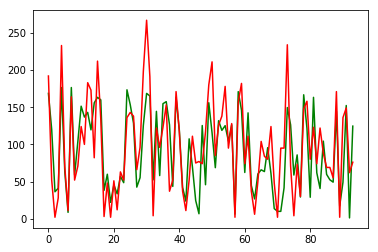

 88%|████████▊ | 30/34 [00:12<00:01,  2.32it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:126.981	val-gamma-nloglik:125.686	train-sMAPE:1.83628	val-sMAPE:1.84653
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.80629	val-gamma-nloglik:4.95748	train-sMAPE:0.427653	val-sMAPE:0.519711
[200]	train-gamma-nloglik:4.72166	val-gamma-nloglik:5.04113	train-sMAPE:0.322576	val-sMAPE:0.499079
[300]	train-gamma-nloglik:4.68268	val-gamma-nloglik:5.15457	train-sMAPE:0.263079	val-sMAPE:0.485881
Stopping. Best iteration:
[303]	train-gamma-nloglik:4.68185	val-gamma-nloglik:5.1518	train-sMAPE:0.260282	val-sMAPE:0.484319



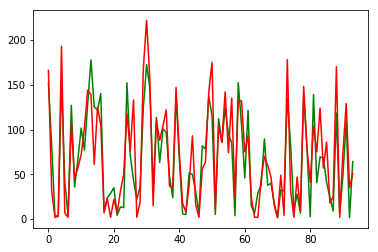

 91%|█████████ | 31/34 [00:13<00:01,  2.27it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:147.644	val-gamma-nloglik:150.316	train-sMAPE:1.82103	val-sMAPE:1.8456
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.87795	val-gamma-nloglik:5.41517	train-sMAPE:0.449691	val-sMAPE:0.579575
Stopping. Best iteration:
[84]	train-gamma-nloglik:4.89692	val-gamma-nloglik:5.33775	train-sMAPE:0.472193	val-sMAPE:0.57575



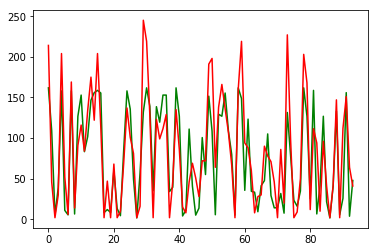

 94%|█████████▍| 32/34 [00:13<00:00,  2.29it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:162.589	val-gamma-nloglik:171.561	train-sMAPE:1.90907	val-sMAPE:1.92531
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.20773	val-gamma-nloglik:5.52189	train-sMAPE:0.366616	val-sMAPE:0.473455
[200]	train-gamma-nloglik:5.15317	val-gamma-nloglik:5.56587	train-sMAPE:0.282613	val-sMAPE:0.467384
Stopping. Best iteration:
[166]	train-gamma-nloglik:5.16605	val-gamma-nloglik:5.54424	train-sMAPE:0.300948	val-sMAPE:0.461165



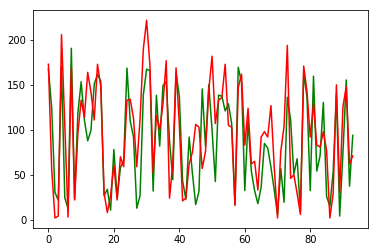

 97%|█████████▋| 33/34 [00:14<00:00,  2.29it/s]

(218, 4)
(94, 4)
8.0
[0]	train-gamma-nloglik:176.851	val-gamma-nloglik:174.617	train-sMAPE:1.94764	val-sMAPE:1.9539
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.3707	val-gamma-nloglik:5.4185	train-sMAPE:0.3428	val-sMAPE:0.404406
[200]	train-gamma-nloglik:5.3289	val-gamma-nloglik:5.44574	train-sMAPE:0.261486	val-sMAPE:0.397196
Stopping. Best iteration:
[164]	train-gamma-nloglik:5.34134	val-gamma-nloglik:5.42558	train-sMAPE:0.285446	val-sMAPE:0.388532



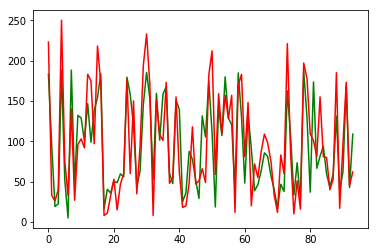

100%|██████████| 34/34 [00:14<00:00,  2.28it/s]


In [157]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,68+6*i+4:68+6*i+5],train_data[:,-115:-114],train_data[:,-110:-109],train_data[:,-104:-103]),axis = 1)
    valX = np.concatenate((val_data[:,68+6*i+4:68+6*i+5],val_data[:,-115:-114],val_data[:,-110:-109],val_data[:,-104:-103]),axis = 1)
    trainY = train_data[:, -102+3*i+2]
    valY = val_data[:, -102+3*i+2]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)
    print(min(valY))
    
    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.8, # 随机采样训练样本
    'colsample_bytree':1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/bj_mean_std/'+ str(i) +'_O3.model') # 用于存储训练出的模型

# O3大维度


  0%|          | 0/34 [00:00<?, ?it/s]

(528, 12329)
(48, 12329)
2.0
[0]	train-gamma-nloglik:162.065	val-gamma-nloglik:176.112	train-sMAPE:1.88353	val-sMAPE:1.82294
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.71369	val-gamma-nloglik:6.13154	train-sMAPE:0.82028	val-sMAPE:1.10504



Exception in thread Thread-364:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[200]	train-gamma-nloglik:5.04652	val-gamma-nloglik:5.29275	train-sMAPE:0.239828	val-sMAPE:0.744212
[300]	train-gamma-nloglik:5.00669	val-gamma-nloglik:5.25665	train-sMAPE:0.144661	val-sMAPE:0.716031
[400]	train-gamma-nloglik:4.99102	val-gamma-nloglik:5.24288	train-sMAPE:0.096942	val-sMAPE:0.706811
Stopping. Best iteration:
[444]	train-gamma-nloglik:4.98702	val-gamma-nloglik:5.24139	train-sMAPE:0.083588	val-sMAPE:0.704989



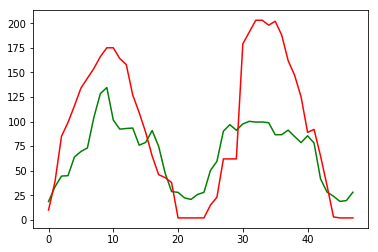

  3%|▎         | 1/34 [00:25<13:53, 25.27s/it]

(528, 12329)
(48, 12329)
2.0
[0]	train-gamma-nloglik:142.235	val-gamma-nloglik:177.35	train-sMAPE:1.89234	val-sMAPE:1.89804
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.44687	val-gamma-nloglik:6.25054	train-sMAPE:0.71935	val-sMAPE:1.01396


KeyboardInterrupt: 

In [331]:
# for i in tqdm(range(34)):
#     trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+12*i:12093+12*(i+1)],train_data[:,-117:-116],train_data[:,-115:-102]),axis = 1)
#     valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+12*i:12093+12*(i+1)],val_data[:,-117:-116],val_data[:,-115:-102]),axis = 1)
#     trainY = train_data[:, -102+3*i+2]
#     valY = val_data[:, -102+3*i+2]
# #     trainY = beijing_train[:, -105+3*i]
# #     valY = beijing_test[:, -105+3*i]
#     print(trainX.shape)
#     print(valX.shape)
#     print(min(valY))
    
#     params={
#     'booster':'gbtree',
#     'objective': 'reg:gamma', #多分类的问题
#     # 'num_class':2, # 类别数，与 multisoftmax 并用
#     'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
#     'max_depth':2, # 构建树的深度，越大越容易过拟合
#     'lambda':1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#     'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
#     'subsample':0.8, # 随机采样训练样本
#     'colsample_bytree':1, # 生成树时进行的列采样
#     'min_child_weight':1, 
#     # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#     #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#     #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
#     'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
#     'eta': 0.05, # 如同学习率
#     'seed':1000,
#     'nthread':-1,# cpu 线程数
# #     'eval_metric':['mae','rmse']
#     }

#     plst = list(params.items())
#     num_rounds = 600 # 迭代次数
#     xgb_train = xgb.DMatrix(trainX, label= trainY)
#     xgb_val = xgb.DMatrix(valX, label= valY)
#     watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
#     #训练模型并保存
#     # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
#     model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
#     plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
#     plt.plot(valY,'r')
#     plt.show()
#     model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing/'+ str(i) +'_O3.model') # 用于存储训练出的模型

# London

In [158]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
train_data, val_data = train_test_split(London_train, test_size = 0.3, random_state = 1)
# train_data, val_data = London_train[:-48,:], London_train[-48:,:]###随机数原始为1

# PM2.5

  0%|          | 0/13 [00:00<?, ?it/s]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:23.2051	val-gamma-nloglik:23.8615	train-sMAPE:1.82831	val-sMAPE:1.83141
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.50426	val-gamma-nloglik:3.54236	train-sMAPE:0.136475	val-sMAPE:0.185673
[200]	train-gamma-nloglik:3.49175	val-gamma-nloglik:3.52627	train-sMAPE:0.007575	val-sMAPE:0.114322
Stopping. Best iteration:
[208]	train-gamma-nloglik:3.49174	val-gamma-nloglik:3.52623	train-sMAPE:0.006632	val-sMAPE:0.114169



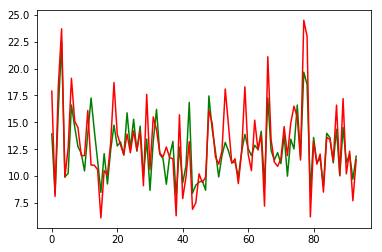

  8%|▊         | 1/13 [00:05<01:11,  5.98s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:21.4872	val-gamma-nloglik:18.6458	train-sMAPE:1.66888	val-sMAPE:1.68398
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.03341	val-gamma-nloglik:3.17609	train-sMAPE:0.167697	val-sMAPE:0.368494
[200]	train-gamma-nloglik:3.0084	val-gamma-nloglik:3.16687	train-sMAPE:0.017836	val-sMAPE:0.314396
Stopping. Best iteration:
[198]	train-gamma-nloglik:3.00841	val-gamma-nloglik:3.16667	train-sMAPE:0.018209	val-sMAPE:0.314346



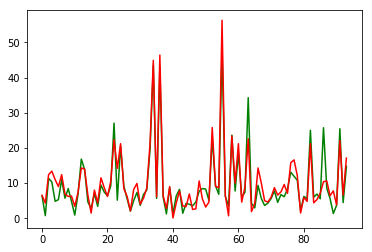

 15%|█▌        | 2/13 [00:11<01:02,  5.67s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:25.1791	val-gamma-nloglik:21.7187	train-sMAPE:1.78334	val-sMAPE:1.76989
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.39446	val-gamma-nloglik:3.31797	train-sMAPE:0.15706	val-sMAPE:0.221057
Stopping. Best iteration:
[133]	train-gamma-nloglik:3.37406	val-gamma-nloglik:3.31028	train-sMAPE:0.055419	val-sMAPE:0.197832



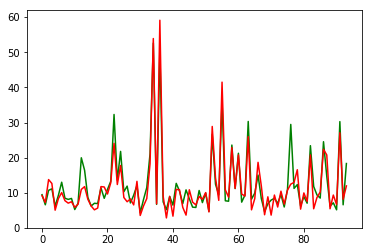

 23%|██▎       | 3/13 [00:15<00:51,  5.15s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:27.3137	val-gamma-nloglik:27.9523	train-sMAPE:1.82318	val-sMAPE:1.83341
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.56973	val-gamma-nloglik:3.63451	train-sMAPE:0.158049	val-sMAPE:0.230682
[200]	train-gamma-nloglik:3.55103	val-gamma-nloglik:3.61173	train-sMAPE:0.008584	val-sMAPE:0.125321
[300]	train-gamma-nloglik:3.55097	val-gamma-nloglik:3.61174	train-sMAPE:0.0025	val-sMAPE:0.125196
Stopping. Best iteration:
[262]	train-gamma-nloglik:3.55098	val-gamma-nloglik:3.61173	train-sMAPE:0.003995	val-sMAPE:0.12518



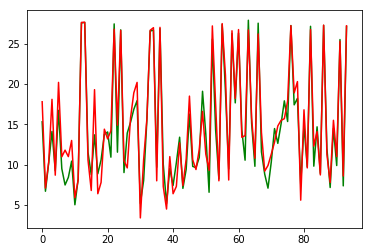

 31%|███       | 4/13 [00:22<00:49,  5.54s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:26.9807	val-gamma-nloglik:22.8171	train-sMAPE:1.7649	val-sMAPE:1.75244
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.36018	val-gamma-nloglik:3.52538	train-sMAPE:0.209726	val-sMAPE:0.368614
[200]	train-gamma-nloglik:3.32168	val-gamma-nloglik:3.57569	train-sMAPE:0.016306	val-sMAPE:0.31524
Stopping. Best iteration:
[212]	train-gamma-nloglik:3.32161	val-gamma-nloglik:3.57688	train-sMAPE:0.013626	val-sMAPE:0.315099



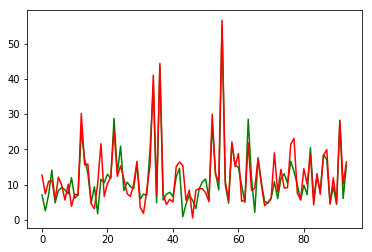

 38%|███▊      | 5/13 [00:28<00:44,  5.62s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:29.1505	val-gamma-nloglik:26.1369	train-sMAPE:1.80841	val-sMAPE:1.80513
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.53441	val-gamma-nloglik:3.51109	train-sMAPE:0.1708	val-sMAPE:0.242283
[200]	train-gamma-nloglik:3.50738	val-gamma-nloglik:3.48821	train-sMAPE:0.009332	val-sMAPE:0.172095
[300]	train-gamma-nloglik:3.50732	val-gamma-nloglik:3.48803	train-sMAPE:0.002286	val-sMAPE:0.171723
Stopping. Best iteration:
[272]	train-gamma-nloglik:3.50732	val-gamma-nloglik:3.48803	train-sMAPE:0.003274	val-sMAPE:0.171684



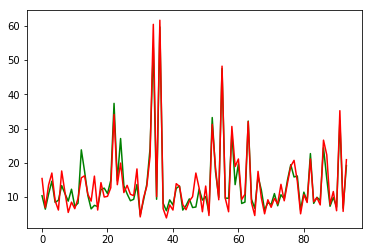

 46%|████▌     | 6/13 [00:35<00:41,  5.89s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:27.922	val-gamma-nloglik:24.3571	train-sMAPE:1.77499	val-sMAPE:1.77715
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.43252	val-gamma-nloglik:3.41502	train-sMAPE:0.175225	val-sMAPE:0.261172
[200]	train-gamma-nloglik:3.40467	val-gamma-nloglik:3.39539	train-sMAPE:0.014048	val-sMAPE:0.197907
[300]	train-gamma-nloglik:3.40453	val-gamma-nloglik:3.39551	train-sMAPE:0.004257	val-sMAPE:0.197862
Stopping. Best iteration:
[256]	train-gamma-nloglik:3.40455	val-gamma-nloglik:3.39546	train-sMAPE:0.007073	val-sMAPE:0.197558



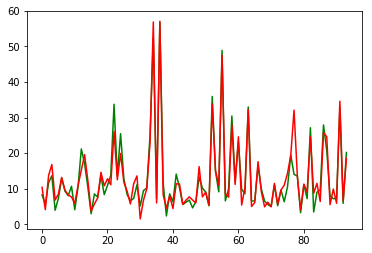

 54%|█████▍    | 7/13 [00:42<00:36,  6.03s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:33.8983	val-gamma-nloglik:32.5559	train-sMAPE:1.84778	val-sMAPE:1.84751
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.76207	val-gamma-nloglik:3.79159	train-sMAPE:0.206101	val-sMAPE:0.276895
[200]	train-gamma-nloglik:3.72667	val-gamma-nloglik:3.75622	train-sMAPE:0.01837	val-sMAPE:0.212277
Stopping. Best iteration:
[150]	train-gamma-nloglik:3.72797	val-gamma-nloglik:3.7575	train-sMAPE:0.044474	val-sMAPE:0.212256



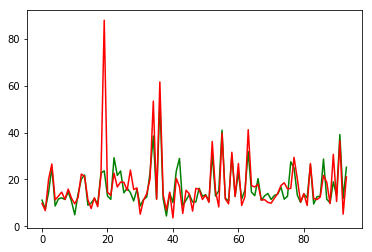

 62%|██████▏   | 8/13 [00:46<00:29,  5.85s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:48.5031	val-gamma-nloglik:48.3484	train-sMAPE:1.86247	val-sMAPE:1.86482
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.02427	val-gamma-nloglik:4.03754	train-sMAPE:0.255851	val-sMAPE:0.261072
[200]	train-gamma-nloglik:3.96875	val-gamma-nloglik:3.98475	train-sMAPE:0.002376	val-sMAPE:0.021245
Stopping. Best iteration:
[190]	train-gamma-nloglik:3.96875	val-gamma-nloglik:3.98475	train-sMAPE:0.003634	val-sMAPE:0.021146



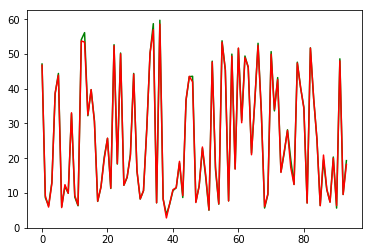

 69%|██████▉   | 9/13 [00:52<00:23,  5.81s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:20.5302	val-gamma-nloglik:18.6444	train-sMAPE:1.73991	val-sMAPE:1.73802
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.19324	val-gamma-nloglik:3.16586	train-sMAPE:0.129948	val-sMAPE:0.165632
[200]	train-gamma-nloglik:3.17737	val-gamma-nloglik:3.152	train-sMAPE:0.006704	val-sMAPE:0.112966
[300]	train-gamma-nloglik:3.17733	val-gamma-nloglik:3.1518	train-sMAPE:0.001475	val-sMAPE:0.112078
[400]	train-gamma-nloglik:3.17733	val-gamma-nloglik:3.15177	train-sMAPE:0.00042	val-sMAPE:0.111946
[500]	train-gamma-nloglik:3.17733	val-gamma-nloglik:3.15177	train-sMAPE:0.000369	val-sMAPE:0.111932
Stopping. Best iteration:
[457]	train-gamma-nloglik:3.17733	val-gamma-nloglik:3.15177	train-sMAPE:0.000369	val-sMAPE:0.111931



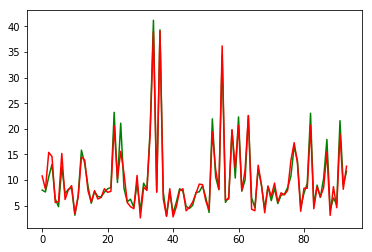

 77%|███████▋  | 10/13 [01:02<00:18,  6.22s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:17.1315	val-gamma-nloglik:16.3291	train-sMAPE:1.59209	val-sMAPE:1.5371
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:2.28894	val-gamma-nloglik:2.20657	train-sMAPE:0.106748	val-sMAPE:0.202199
[200]	train-gamma-nloglik:2.27768	val-gamma-nloglik:2.19356	train-sMAPE:0.003885	val-sMAPE:0.133203
Stopping. Best iteration:
[180]	train-gamma-nloglik:2.2777	val-gamma-nloglik:2.19349	train-sMAPE:0.005853	val-sMAPE:0.133027



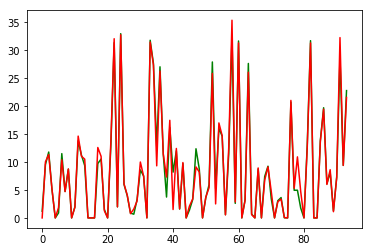

 85%|████████▍ | 11/13 [01:07<00:12,  6.12s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:26.9259	val-gamma-nloglik:23.5109	train-sMAPE:1.785	val-sMAPE:1.78368
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.44464	val-gamma-nloglik:3.45382	train-sMAPE:0.178386	val-sMAPE:0.302619
[200]	train-gamma-nloglik:3.41577	val-gamma-nloglik:3.42764	train-sMAPE:0.015465	val-sMAPE:0.267222
Stopping. Best iteration:
[167]	train-gamma-nloglik:3.41617	val-gamma-nloglik:3.42794	train-sMAPE:0.027467	val-sMAPE:0.266293



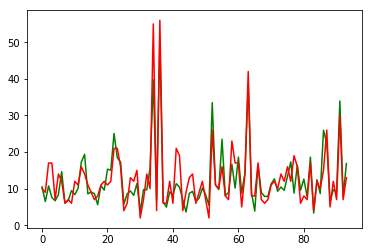

 92%|█████████▏| 12/13 [01:12<00:06,  6.02s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:34.2604	val-gamma-nloglik:29.3341	train-sMAPE:1.84608	val-sMAPE:1.84011
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.73823	val-gamma-nloglik:3.6609	train-sMAPE:0.190936	val-sMAPE:0.195962
Stopping. Best iteration:
[134]	train-gamma-nloglik:3.70543	val-gamma-nloglik:3.64255	train-sMAPE:0.050689	val-sMAPE:0.142162



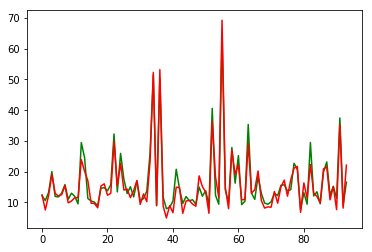

100%|██████████| 13/13 [01:16<00:00,  5.90s/it]


In [159]:
for i in tqdm(range(13)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,26:2185],train_data[:,2185+18*i:2185+18*(i+1)],train_data[:,-34:-26]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,26:2185],val_data[:,2185+18*i:2185+18*(i+1)],val_data[:,-34:-26]),axis = 1)
    trainY = train_data[:, -26+2*i]
    valY = val_data[:, -26+2*i]
    trainY[trainY <= 0] = 0.1
    valY[valY <= 0] = 0.1
#     trainY = London_train[:, -26+2*i]
#     valY = London_test[:, -26+2*i]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval = 100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/ld_mean_std/'+ str(i) +'_PM2.5.model') # 用于存储训练出的模型

# PM10

  0%|          | 0/13 [00:00<?, ?it/s]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:46.0692	val-gamma-nloglik:42.9169	train-sMAPE:1.89485	val-sMAPE:1.89429
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.12628	val-gamma-nloglik:4.10672	train-sMAPE:0.249533	val-sMAPE:0.271038
[200]	train-gamma-nloglik:4.07781	val-gamma-nloglik:4.06644	train-sMAPE:0.008854	val-sMAPE:0.156585
Stopping. Best iteration:
[245]	train-gamma-nloglik:4.07776	val-gamma-nloglik:4.06635	train-sMAPE:0.004202	val-sMAPE:0.156174



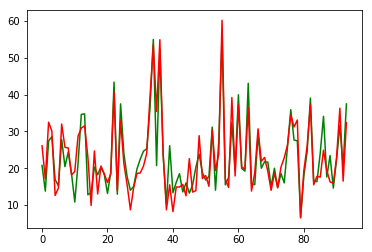

  8%|▊         | 1/13 [00:06<01:19,  6.63s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:40.152	val-gamma-nloglik:35.8228	train-sMAPE:1.8711	val-sMAPE:1.86627
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.94521	val-gamma-nloglik:3.8848	train-sMAPE:0.225655	val-sMAPE:0.259816
[200]	train-gamma-nloglik:3.90294	val-gamma-nloglik:3.85408	train-sMAPE:0.012119	val-sMAPE:0.150447
[300]	train-gamma-nloglik:3.90282	val-gamma-nloglik:3.85405	train-sMAPE:0.002487	val-sMAPE:0.14979
Stopping. Best iteration:
[298]	train-gamma-nloglik:3.90282	val-gamma-nloglik:3.85404	train-sMAPE:0.002544	val-sMAPE:0.149771



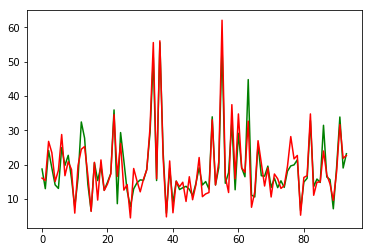

 15%|█▌        | 2/13 [00:14<01:18,  7.11s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:36.9547	val-gamma-nloglik:33.4722	train-sMAPE:1.85975	val-sMAPE:1.85158
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.85093	val-gamma-nloglik:3.79015	train-sMAPE:0.207388	val-sMAPE:0.259752
[200]	train-gamma-nloglik:3.81431	val-gamma-nloglik:3.76434	train-sMAPE:0.012348	val-sMAPE:0.165003
[300]	train-gamma-nloglik:3.81419	val-gamma-nloglik:3.76425	train-sMAPE:0.00285	val-sMAPE:0.163829
Stopping. Best iteration:
[300]	train-gamma-nloglik:3.81419	val-gamma-nloglik:3.76425	train-sMAPE:0.00285	val-sMAPE:0.163829



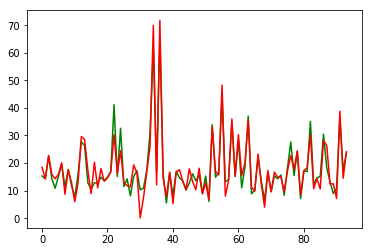

 23%|██▎       | 3/13 [00:21<01:13,  7.30s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:47.044	val-gamma-nloglik:46.995	train-sMAPE:1.89817	val-sMAPE:1.90259
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.16413	val-gamma-nloglik:4.1987	train-sMAPE:0.256312	val-sMAPE:0.277061
[200]	train-gamma-nloglik:4.11594	val-gamma-nloglik:4.14967	train-sMAPE:0.012879	val-sMAPE:0.116324
[300]	train-gamma-nloglik:4.11582	val-gamma-nloglik:4.14945	train-sMAPE:0.003333	val-sMAPE:0.114725
[400]	train-gamma-nloglik:4.11581	val-gamma-nloglik:4.14942	train-sMAPE:0.001096	val-sMAPE:0.114479
[500]	train-gamma-nloglik:4.11581	val-gamma-nloglik:4.1494	train-sMAPE:0.000416	val-sMAPE:0.11438
Stopping. Best iteration:
[477]	train-gamma-nloglik:4.11581	val-gamma-nloglik:4.1494	train-sMAPE:0.000453	val-sMAPE:0.114378



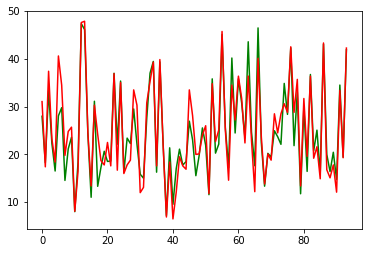

 31%|███       | 4/13 [00:32<01:14,  8.24s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:38.978	val-gamma-nloglik:34.6105	train-sMAPE:1.86702	val-sMAPE:1.86295
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.91456	val-gamma-nloglik:3.86524	train-sMAPE:0.223407	val-sMAPE:0.269003
[200]	train-gamma-nloglik:3.87375	val-gamma-nloglik:3.83316	train-sMAPE:0.01183	val-sMAPE:0.193147
[300]	train-gamma-nloglik:3.87365	val-gamma-nloglik:3.83299	train-sMAPE:0.002649	val-sMAPE:0.193141
Stopping. Best iteration:
[251]	train-gamma-nloglik:3.87366	val-gamma-nloglik:3.83301	train-sMAPE:0.005138	val-sMAPE:0.193104



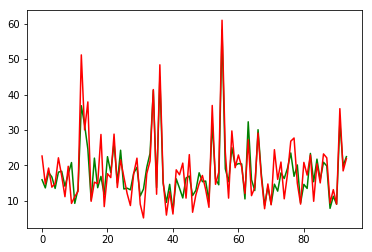

 38%|███▊      | 5/13 [00:39<01:03,  7.98s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:44.1815	val-gamma-nloglik:40.036	train-sMAPE:1.89031	val-sMAPE:1.88759
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.07575	val-gamma-nloglik:4.02047	train-sMAPE:0.240273	val-sMAPE:0.247491
[200]	train-gamma-nloglik:4.03013	val-gamma-nloglik:3.98355	train-sMAPE:0.009525	val-sMAPE:0.113629
[300]	train-gamma-nloglik:4.03006	val-gamma-nloglik:3.98347	train-sMAPE:0.002402	val-sMAPE:0.113049
[400]	train-gamma-nloglik:4.03005	val-gamma-nloglik:3.98346	train-sMAPE:0.000691	val-sMAPE:0.112953
[500]	train-gamma-nloglik:4.03005	val-gamma-nloglik:3.98345	train-sMAPE:0.000383	val-sMAPE:0.112898
Stopping. Best iteration:
[481]	train-gamma-nloglik:4.03005	val-gamma-nloglik:3.98345	train-sMAPE:0.000394	val-sMAPE:0.112894



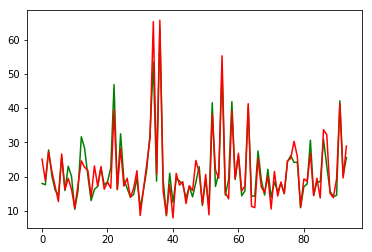

 46%|████▌     | 6/13 [00:50<00:59,  8.43s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:45.0527	val-gamma-nloglik:39.867	train-sMAPE:1.88583	val-sMAPE:1.88521
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.07145	val-gamma-nloglik:4.0083	train-sMAPE:0.249224	val-sMAPE:0.247548
Stopping. Best iteration:
[143]	train-gamma-nloglik:4.02158	val-gamma-nloglik:3.97772	train-sMAPE:0.05292	val-sMAPE:0.144649



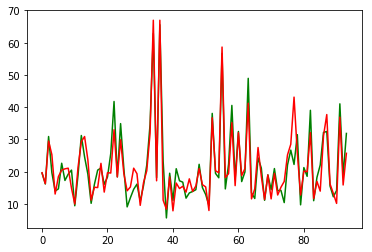

 54%|█████▍    | 7/13 [00:55<00:47,  7.89s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:47.8104	val-gamma-nloglik:45.1055	train-sMAPE:1.90229	val-sMAPE:1.90137
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.18471	val-gamma-nloglik:4.16417	train-sMAPE:0.257667	val-sMAPE:0.269268
[200]	train-gamma-nloglik:4.13445	val-gamma-nloglik:4.11977	train-sMAPE:0.013401	val-sMAPE:0.143768
[300]	train-gamma-nloglik:4.13433	val-gamma-nloglik:4.11961	train-sMAPE:0.003327	val-sMAPE:0.143202
[400]	train-gamma-nloglik:4.13432	val-gamma-nloglik:4.11958	train-sMAPE:0.000908	val-sMAPE:0.143095
[500]	train-gamma-nloglik:4.13432	val-gamma-nloglik:4.11958	train-sMAPE:0.000396	val-sMAPE:0.143065
Stopping. Best iteration:
[541]	train-gamma-nloglik:4.13432	val-gamma-nloglik:4.11958	train-sMAPE:0.000376	val-sMAPE:0.143058



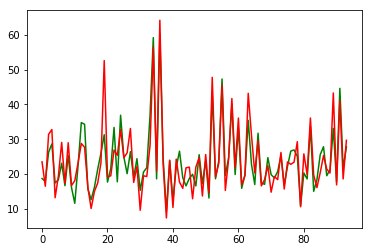

 62%|██████▏   | 8/13 [01:07<00:41,  8.39s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:41.9155	val-gamma-nloglik:37.5189	train-sMAPE:1.88706	val-sMAPE:1.88397
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.03322	val-gamma-nloglik:3.97987	train-sMAPE:0.231699	val-sMAPE:0.243069
Stopping. Best iteration:
[147]	train-gamma-nloglik:3.99286	val-gamma-nloglik:3.94824	train-sMAPE:0.036799	val-sMAPE:0.135168



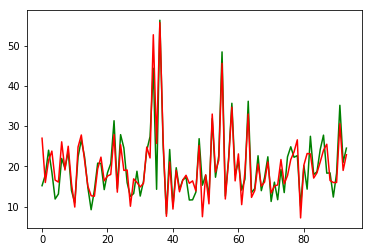

 69%|██████▉   | 9/13 [01:12<00:32,  8.00s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:33.4264	val-gamma-nloglik:30.4457	train-sMAPE:1.84961	val-sMAPE:1.84524
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.76223	val-gamma-nloglik:3.71516	train-sMAPE:0.191837	val-sMAPE:0.211781
[200]	train-gamma-nloglik:3.72984	val-gamma-nloglik:3.69153	train-sMAPE:0.010755	val-sMAPE:0.131216
[300]	train-gamma-nloglik:3.72975	val-gamma-nloglik:3.69137	train-sMAPE:0.00261	val-sMAPE:0.130987
[400]	train-gamma-nloglik:3.72974	val-gamma-nloglik:3.6913	train-sMAPE:0.000747	val-sMAPE:0.130758
[500]	train-gamma-nloglik:3.72974	val-gamma-nloglik:3.69129	train-sMAPE:0.000385	val-sMAPE:0.130719
Stopping. Best iteration:
[501]	train-gamma-nloglik:3.72974	val-gamma-nloglik:3.69129	train-sMAPE:0.000385	val-sMAPE:0.130718



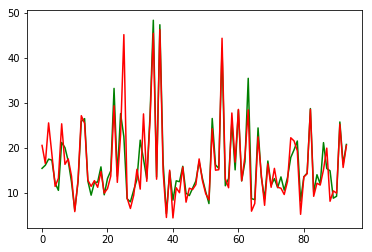

 77%|███████▋  | 10/13 [01:23<00:24,  8.31s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:34.9622	val-gamma-nloglik:30.365	train-sMAPE:1.72192	val-sMAPE:1.68882
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.28921	val-gamma-nloglik:3.15978	train-sMAPE:0.194832	val-sMAPE:0.263745
[200]	train-gamma-nloglik:3.24776	val-gamma-nloglik:3.10719	train-sMAPE:0.006053	val-sMAPE:0.151512
[300]	train-gamma-nloglik:3.24772	val-gamma-nloglik:3.10679	train-sMAPE:0.001384	val-sMAPE:0.149608
[400]	train-gamma-nloglik:3.24772	val-gamma-nloglik:3.10675	train-sMAPE:0.000453	val-sMAPE:0.149347
Stopping. Best iteration:
[400]	train-gamma-nloglik:3.24772	val-gamma-nloglik:3.10675	train-sMAPE:0.000453	val-sMAPE:0.149347



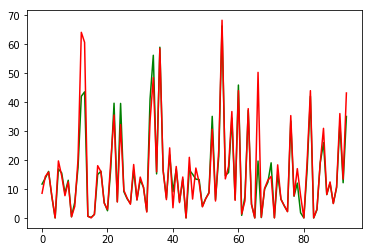

 85%|████████▍ | 11/13 [01:32<00:16,  8.41s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:52.4844	val-gamma-nloglik:45.9778	train-sMAPE:1.90727	val-sMAPE:1.90216
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.26286	val-gamma-nloglik:4.19134	train-sMAPE:0.274307	val-sMAPE:0.299483
[200]	train-gamma-nloglik:4.19505	val-gamma-nloglik:4.1405	train-sMAPE:0.019479	val-sMAPE:0.157821
[300]	train-gamma-nloglik:4.19479	val-gamma-nloglik:4.1402	train-sMAPE:0.004789	val-sMAPE:0.156291
[400]	train-gamma-nloglik:4.19477	val-gamma-nloglik:4.14013	train-sMAPE:0.001339	val-sMAPE:0.155833
[500]	train-gamma-nloglik:4.19477	val-gamma-nloglik:4.14012	train-sMAPE:0.000453	val-sMAPE:0.155775
Stopping. Best iteration:
[467]	train-gamma-nloglik:4.19477	val-gamma-nloglik:4.14012	train-sMAPE:0.000616	val-sMAPE:0.155773



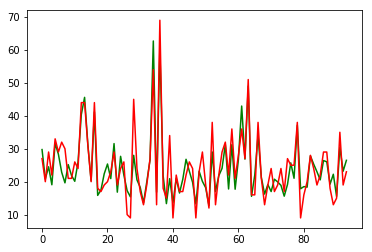

 92%|█████████▏| 12/13 [01:44<00:08,  8.67s/it]

(218, 2187)
(94, 2187)
[0]	train-gamma-nloglik:61.8099	val-gamma-nloglik:55.2891	train-sMAPE:1.92636	val-sMAPE:1.92321
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.47977	val-gamma-nloglik:4.40113	train-sMAPE:0.320603	val-sMAPE:0.304103
[200]	train-gamma-nloglik:4.40106	val-gamma-nloglik:4.34545	train-sMAPE:0.011081	val-sMAPE:0.124187
Stopping. Best iteration:
[243]	train-gamma-nloglik:4.40098	val-gamma-nloglik:4.34536	train-sMAPE:0.005069	val-sMAPE:0.12365



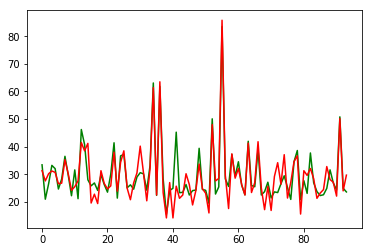

100%|██████████| 13/13 [01:50<00:00,  8.54s/it]


In [160]:
for i in tqdm(range(13)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,26:2185],train_data[:,2185+18*i:2185+18*(i+1)],train_data[:,-34:-26]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,26:2185],val_data[:,2185+18*i:2185+18*(i+1)],val_data[:,-34:-26]),axis = 1)
    trainY = train_data[:, -26+2*i+1]
    valY = val_data[:, -26+2*i+1]
    trainY[trainY <= 0] = 0.1
    valY[valY <= 0] = 0.1
#     trainY = London_train[:, -26+2*i+1]
#     valY = London_test[:, -26+2*i+1]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/ld_mean_std/'+ str(i) +'_PM10.model') # 用于存储训练出的模型

# predict

In [ ]:
import requests
for i in range(9,10):
    for j in range(0,24):
        end   = '2018-05-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/bj/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)
        print('finished!')

for i in range(9,10):
    for j in range(0,24):
        end   = '2018-05-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/ld/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)
        print('finished')

In [161]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def gen_dates(b_date, count):
    hour = timedelta(hours=1)
    for i in range(count+1):
        yield b_date + hour*i


def get_date_list(start=None, end=None):
    """
    获取日期列表
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    if start is None:
        start = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
    if end is None:
        end = datetime.now()
    data = []
    for d in gen_dates(start, int((end-start).total_seconds()/3600)):
        data.append(str(d))
    return data


Medium_PM10 = 88
Medium_PM25 = 59
Medium_O3   = 56
Medium_NO2  = 46
Medium_CO   = 1
Medium_SO2  = 9
def to_timedict_bj(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']]).tolist()
    for i in tqdm(['aotizhongxin', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihuayuan', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuiku', 'nansanhuan', 'nongzhanguan', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxigong','xizhimenbei','yanqin','yizhuang','yongdingmennei','yongledian','yufa','yungang']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.reset_index(drop=True,inplace=True)
#     recons.loc[recons['stationId'] == 'zhiwuyuan_aq',['PM2.5','PM10','NO2','CO','O3','SO2']] = [Medium_PM25,Medium_PM10,Medium_NO2,Medium_CO,Medium_O3,Medium_SO2]

#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons['PM2.5'].fillna(Medium_PM25, inplace = True)
    recons['PM10'].fillna(Medium_PM10, inplace = True)
    recons['NO2'].fillna(Medium_NO2, inplace = True)
    recons['CO'].fillna(Medium_CO, inplace = True)
    recons['O3'].fillna(Medium_O3, inplace = True)
    recons['SO2'].fillna(Medium_SO2, inplace = True)
    
    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['stationId']=='dongsi_aq',['lon','lat']] = [116.417,39.929]
    recons.loc[recons['stationId']=='tiantan_aq',['lon','lat']] = [116.407,39.886]
    recons.loc[recons['stationId']=='guanyuan_aq',['lon','lat']] = [116.339,39.929]
    recons.loc[recons['stationId']=='wanshouxigong_aq',['lon','lat']] = [116.352,39.878]
    recons.loc[recons['stationId']=='aotizhongxin_aq',['lon','lat']] = [116.397,39.982]
    recons.loc[recons['stationId']=='nongzhanguan_aq',['lon','lat']] = [116.461,39.937]
    recons.loc[recons['stationId']=='wanliu_aq',['lon','lat']] = [116.287,39.987]
    recons.loc[recons['stationId']=='beibuxinqu_aq',['lon','lat']] = [116.174,40.09]
    recons.loc[recons['stationId']=='zhiwuyuan_aq',['lon','lat']] = [116.207,40.002]
    recons.loc[recons['stationId']=='fengtaihuayuan_aq',['lon','lat']] = [116.279,39.863]
    recons.loc[recons['stationId']=='yungang_aq',['lon','lat']] = [116.146,39.824]
    recons.loc[recons['stationId']=='gucheng_aq',['lon','lat']] = [116.184,39.914]
    recons.loc[recons['stationId']=='fangshan_aq',['lon','lat']] = [116.136,39.742]
    recons.loc[recons['stationId']=='daxing_aq',['lon','lat']] = [116.404,39.718]
    recons.loc[recons['stationId']=='yizhuang_aq',['lon','lat']] = [116.506,39.795]
    recons.loc[recons['stationId']=='tongzhou_aq',['lon','lat']] = [116.663,39.886]
    recons.loc[recons['stationId']=='shunyi_aq',['lon','lat']] = [116.655,40.127]
    recons.loc[recons['stationId']=='pingchang_aq',['lon','lat']] = [116.23,40.217]
    recons.loc[recons['stationId']=='mentougou_aq',['lon','lat']] = [116.106,39.937]
    recons.loc[recons['stationId']=='pinggu_aq',['lon','lat']] = [117.1,40.143]
    recons.loc[recons['stationId']=='hureconsou_aq',['lon','lat']] = [116.628,40.328]
    recons.loc[recons['stationId']=='miyun_aq',['lon','lat']] = [116.832,40.37]
    recons.loc[recons['stationId']=='yanqin_aq',['lon','lat']] = [115.972,40.453]
    recons.loc[recons['stationId']=='dingling_aq',['lon','lat']] = [116.22,40.292]
    recons.loc[recons['stationId']=='badaling_aq',['lon','lat']] = [115.988,40.365]
    recons.loc[recons['stationId']=='miyunshuiku_aq',['lon','lat']] = [116.911,40.499]
    recons.loc[recons['stationId']=='donggaocun_aq',['lon','lat']] = [117.12,40.1]
    recons.loc[recons['stationId']=='yongledian_aq',['lon','lat']] = [116.783,39.712]
    recons.loc[recons['stationId']=='yufa_aq',['lon','lat']] = [116.3,39.52]
    recons.loc[recons['stationId']=='liulihe_aq',['lon','lat']] = [116,39.58]
    recons.loc[recons['stationId']=='qianmen_aq',['lon','lat']] = [116.395,39.899]
    recons.loc[recons['stationId']=='yongdingmennei_aq',['lon','lat']] = [116.394,39.876]
    recons.loc[recons['stationId']=='xizhimenbei_aq',['lon','lat']] = [116.349,39.954]
    recons.loc[recons['stationId']=='nansanhuan_aq',['lon','lat']] = [116.368,39.856]
    recons.loc[recons['stationId']=='dongsihuan_aq',['lon','lat']] = [116.483,39.939]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5','PM10','NO2','CO','O3','SO2']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
        
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 272:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    ######################处理缺失时间点完毕#####################shunyi_meo


    recons_meo = pd.DataFrame(columns=('station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather'))

    alt = np.array(meo[['station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    for i in tqdm(['shunyi_meo','hadian_meo','yanqing_meo','miyun_meo','huairou_meo','shangdianzi_meo','pinggu_meo','tongzhou_meo','chaoyang_meo','pingchang_meo','zhaitang_meo','mentougou_meo','beijing_meo','shijingshan_meo','fengtai_meo','daxing_meo','fangshan_meo','xiayunling_meo']):
        count = 0
        for j in meo['station_id']:
            if j == i:
                recons_meo.loc[count] = alt[count]
            count += 1 
    
    for i in range(len(recons_meo['wind_speed'])):
        if recons_meo['wind_speed'][i] == 999017:
            recons_meo.loc[i,'wind_speed'] = recons_meo.loc[i-1,'wind_speed']
    recons_meo['longitude'] = 0 ##经度
    recons_meo['latitude'] = 0  ##纬度
    recons_meo.loc[recons_meo['station_id']=='shunyi_meo',['longitude','latitude']] = [116.6153,40.12667]
    recons_meo.loc[recons_meo['station_id']=='haidian_meo',['longitude','latitude']] = [116.2906,39.98694]
    recons_meo.loc[recons_meo['station_id']=='yanqing_meo',['longitude','latitude']] = [115.9689,40.44944]
    recons_meo.loc[recons_meo['station_id']=='miyun_meo',['longitude','latitude']] = [116.8642,40.3775]
    recons_meo.loc[recons_meo['station_id']=='huairou_meo',['longitude','latitude']] = [116.6269,40.35778]
    recons_meo.loc[recons_meo['station_id']=='shangdianzi_meo',['longitude','latitude']] = [117.1117,40.65889]
    recons_meo.loc[recons_meo['station_id']=='pinggu_meo',['longitude','latitude']] = [117.1178,40.16944]
    recons_meo.loc[recons_meo['station_id']=='tongzhou_meo',['longitude','latitude']] = [116.7567,39.8475]
    recons_meo.loc[recons_meo['station_id']=='chaoyang_meo',['longitude','latitude']] = [116.5008,39.9525]
    recons_meo.loc[recons_meo['station_id']=='pingchang_meo',['longitude','latitude']] = [116.2117,40.22333]
    recons_meo.loc[recons_meo['station_id']=='zhaitang_meo',['longitude','latitude']] = [115.6922,39.97389]
    recons_meo.loc[recons_meo['station_id']=='mentougou_meo',['longitude','latitude']] = [116.1564,39.88778]
    recons_meo.loc[recons_meo['station_id']=='beijing_meo',['longitude','latitude']] = [116.4694,39.80611]
    recons_meo.loc[recons_meo['station_id']=='shijingshan_meo',['longitude','latitude']] = [116.2053,39.9425]
    recons_meo.loc[recons_meo['station_id']=='fengtai_meo',['longitude','latitude']] = [116.2453,39.87028]
    recons_meo.loc[recons_meo['station_id']=='daxing_meo',['longitude','latitude']] = [116.3544,39.71861]
    recons_meo.loc[recons_meo['station_id']=='fangshan_meo',['longitude','latitude']] = [116.1942,39.77306]
    recons_meo.loc[recons_meo['station_id']=='xiayunling_meo',['longitude','latitude']] = [115.7406,39.72861]

    recons_meo.loc[meo['weather'] == 'Sunny/clear' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Snow' , 'weather'] = 1
    recons_meo.loc[meo['weather'] == 'Sleet' , 'weather'] = 2
    recons_meo.loc[meo['weather'] == 'Sand' , 'weather'] = 3
    recons_meo.loc[meo['weather'] == 'Rain/Snow with Hail' , 'weather'] = 4
    recons_meo.loc[meo['weather'] == 'Rain with Hail' , 'weather'] = 5
    recons_meo.loc[meo['weather'] == 'Rain' , 'weather'] = 6
    recons_meo.loc[meo['weather'] == 'Haze' , 'weather'] = 7
    recons_meo.loc[meo['weather'] == 'Fog' , 'weather'] = 8
    recons_meo.loc[meo['weather'] == 'Dust' , 'weather'] = 9
    recons_meo.loc[meo['weather'] == 'Hail' , 'weather'] = 4
    recons_meo.loc[meo['weather'] == 'Cloudy' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Overcast' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Thundershower' , 'weather'] = 6
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    recons_meo['temperature'] = recons_meo['temperature'].apply(div5)
    recons_meo['pressure'] = recons_meo['pressure'].apply(div5)
    recons_meo['humidity'] = recons_meo['humidity'].apply(div5)
    recons_meo['wind_direction'] = recons_meo['wind_direction'].apply(div15)
    recons_meo['wind_speed'] = recons_meo['wind_speed'].apply(div05)
    #############wether量化###############

    #############处理缺失时间点##########
    count = 0
    Idx = 0  ####索引记录####
    meo_list = np.array(recons_meo[['temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    

    for i in tqdm(np.array(recons_meo['time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(meo_list[Idx])

        Idx += 1
        
    length = []  
    
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    ######################处理缺失时间点完毕#####################
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(1150,1181,1):
        for j in range(390,411,1):
            if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                meo_grid.loc[meo_grid['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                 print([i,j])
            count += 1
    
    meo_grid.drop(meo_grid[meo_grid['longitude'] < 115.6].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] > 117.2].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 39.5].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 40.7].index.tolist(),inplace= True)
    meo_grid.drop('id',axis = 1)
    meo_grid.drop_duplicates(inplace=True)
    meo_grid.reset_index(drop=True,inplace=True)
#     print(meo_grid.head(100))
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    
    
    
    
    count = 1
    Idx = 0  ####索引记录####

    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 9:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1])
            if count > 9:
                for j in range(count-9):
                    alt_dict[i].extend(meo_grid_list[Idx+1])
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
        
        
        
        
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1485:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) != 1485:
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
            
            
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(1150,1181,1):
            for j in range(390,411,1):
                if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                    weather_fore.loc[weather_fore['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < 115.6].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 117.2].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 39.5].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 40.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 12093:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(12093-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(1485,12093))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))])
            alt_dict[i][1485:12093] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))]).tolist()
        count += 1
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 16
#     win = 168
    
    for i in tqdm(range(68,272)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-win:count]),np.std(alt_frame[i][count-win:count])])
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-int(win/2):count]),np.std(alt_frame[i][count-int(win/2):count])])
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-int(win/4):count]),np.std(alt_frame[i][count-int(win/4):count])])
                if i == 271:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,10,11,12]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [16,17,18,19,20]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,6):
            SUM = 0
            for j in range(0,34):
                SUM += alt_dict[k][68+j*6+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0,0,0,0])
        else:
            for m,n in zip(alt_dict[k][-6:] ,alt_dict[hour_last][-12:-6]):
                alt_dict[k].append(m-n)

        hour_last = k
        count += 1
#     ##########标签值 PM10 PM2.5 O3##########
#     step = 72  ####预测间隔
#     for i in tqdm(range(272)):  ##训练数据
#         count = 0
#         for j in alt_frame[i]:
#             if count+step < len(alt_frame[i]) and (i%8 == 0 or i%8 == 1 or i%8 == 4):
#                 alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
#             count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 4973:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i]) <  max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [162]:
Start = datetime.strptime("2018-05-15 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-18 23:00:00", "%Y-%m-%d %H:%M:%S")

pre_dict_bj = to_timedict_bj(start = Start, end = End)
pre_frame_bj = pd.DataFrame.from_dict(pre_dict_bj).T
pre_list_bj = np.array(pre_frame_bj)

  0%|          | 0/18 [00:00<?, ?it/s]

272
272


100%|██████████| 1688/1688 [00:00<00:00, 1359966.41it/s]


380
272
380
380


  0%|          | 0/96 [00:00<?, ?it/s]

1485
1485
1485
1485


  1%|          | 2/204 [00:00<00:11, 18.20it/s]

12093
1485


100%|██████████| 96/96 [00:00<00:00, 32805.38it/s]


13332
12105
13332
13332


In [163]:
pre_list_bj.shape

(48, 13332)

# LondonPre

In [164]:
Medium_PM10 = 13.437369
Medium_PM25 = 20.921357
Medium_O3   = 43.428245

def to_timedict_ld(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Predict/ld_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Predict/ld_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid.drop('id',axis=1, inplace = True)
    meo_grid.drop_duplicates(inplace = True)
    meo_grid.reset_index(drop = True, inplace =True)
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration']]).tolist()
    for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.drop_duplicates(inplace = True)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['station_id'] == 'TH4' , 'NO2 (ug/m3)'])
    recons['PM2.5 (ug/m3)'].fillna(Medium_PM25, inplace = True)
    recons['PM10 (ug/m3)'].fillna(Medium_PM10, inplace = True)
    recons['NO2 (ug/m3)'].fillna(Medium_NO2, inplace = True)

    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='CD9',['lon','lat']] = [-0.129053205,51.52770662]
    recons.loc[recons['station_id']=='CD1',['lon','lat']] = [-0.175284,51.544219]
    recons.loc[recons['station_id']=='GN0',['lon','lat']] = [0.074003,51.490532]
    recons.loc[recons['station_id']=='GR4',['lon','lat']] = [0.070766,51.45258]
    recons.loc[recons['station_id']=='GN3',['lon','lat']] = [0.095111,51.486957]
    recons.loc[recons['station_id']=='GR9',['lon','lat']] = [0.040725,51.456357]
    recons.loc[recons['station_id']=='HV1',['lon','lat']] = [0.205460706,51.52078746]
    recons.loc[recons['station_id']=='KF1',['lon','lat']] = [-0.21349214,51.52104675]
    recons.loc[recons['station_id']=='LW2',['lon','lat']] = [-0.039641,51.474954]
    recons.loc[recons['station_id']=='ST5',['lon','lat']] = [-0.141661525,51.3892869]
    recons.loc[recons['station_id']=='TH4',['lon','lat']] = [-0.008418493,51.51504617]
    recons.loc[recons['station_id']=='MY7',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.15459,51.52254]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))

    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(-20,21,1):
        for j in range(505,526,1):
            if (i >= -4 and i <=3) and (j >= 513 and j <= 517):
                meo_grid.loc[meo_grid['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
            count += 1
    print(meo_grid)
    meo_grid.drop(meo_grid[meo_grid['longitude'] < -0.4].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] >  0.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 51.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 51.7].index.tolist(),inplace= True)
    meo_grid.reset_index(drop = True,inplace = True)
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    print(meo_grid)
    count = 1
    Idx = 0  ####索引记录####
#     print(meo_grid['station_id'][15561])
    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 17:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1]) 
            if count > 17:
                for j in range(count-17):
                    alt_dict[i].extend(meo_grid_list[Idx+1]) 
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 2217:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0])!= 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(-20,21,1):
            for j in range(505,526,1):
                if (i >= -4 and i <= 3) and (j >= 513 and j <= 517):
                    weather_fore.loc[weather_fore['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < -0.4].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 0.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 51.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 51.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 2185:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(2185-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(265,2185))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))])
            alt_dict[i][265:2185] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))]).tolist()
        count += 1
#     print(alt_frame[62])
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 168

    for i in tqdm(range(26,65)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-win:count]),np.std(alt_frame[i][count-win:count])])
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-int(win/2):count]),np.std(alt_frame[i][count-int(win/2):count])])
                alt_dict[alt_frame.index[count]].extend([np.mean(alt_frame[i][count-int(win/4):count]),np.std(alt_frame[i][count-int(win/4):count])])
                if i == 64:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
#                     if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [8,9,10,18,19,20]: #####是否为早晚高峰时段（北京转utc时间）
#                         alt_dict[alt_frame.index[count]].extend([2])
#                     elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,3,4,5]:
#                         alt_dict[alt_frame.index[count]].extend([1])
#                     else:
#                         alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,3):
            SUM = 0
            for j in range(0,13):
                SUM += alt_dict[k][26+j*3+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0])
        else:
            for m,n in zip(alt_dict[k][-3:] ,alt_dict[hour_last][-6:-3]):
                alt_dict[k].append(m-n)
        hour_last = k
        count += 1
#     ##########标签值 PM10 PM2.5 O3##########
#     step = 72
#     for i in tqdm(range(65)):  ##训练数据
#         count = 0
#         for j in alt_frame[i]:
#             if count+step < len(alt_frame[i]) and (i%5 == 0 or i%5 == 1):
#                 alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
#             count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 6092:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
            
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i])<max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [165]:
pre_dict_ld = to_timedict_ld(start = Start, end = End)
pre_frame_ld = pd.DataFrame.from_dict(pre_dict_ld).T
pre_list_ld = np.array(pre_frame_ld)

100%|██████████| 1248/1248 [00:00<00:00, 1263759.39it/s]


65
65
65
65


  0%|          | 0/96 [00:00<?, ?it/s]

            station_id                 time            weather  temperature  \
0      london_grid_000  2018-05-15 00:00:00          CLEAR_DAY        11.87   
1      london_grid_001  2018-05-15 00:00:00          CLEAR_DAY        10.97   
2      london_grid_002  2018-05-15 00:00:00          CLEAR_DAY        10.08   
3      london_grid_003  2018-05-15 00:00:00          CLEAR_DAY         9.35   
4      london_grid_004  2018-05-15 00:00:00          CLEAR_DAY         8.78   
5      london_grid_005  2018-05-15 00:00:00          CLEAR_DAY         8.21   
6      london_grid_006  2018-05-15 00:00:00          CLEAR_DAY         8.19   
7      london_grid_007  2018-05-15 00:00:00          CLEAR_DAY         8.16   
8      london_grid_008  2018-05-15 00:00:00          CLEAR_DAY         8.13   
9      london_grid_009  2018-05-15 00:00:00          CLEAR_DAY         8.08   
10     london_grid_010  2018-05-15 00:00:00          CLEAR_DAY         8.03   
11     london_grid_011  2018-05-15 00:00:00         

  5%|▌         | 2/39 [00:00<00:02, 18.31it/s]

2185
265


100%|██████████| 96/96 [00:00<00:00, 113711.72it/s]


2427
2191
2427
2427


In [166]:
pre_list_ld.shape

(48, 2427)

In [167]:
import xgboost as xgb

date_submit = '2018-5-19_big_S'
submit = pd.read_csv('/home/lifuzhen/KDD2018/sample_submissioin.csv')
##########北京##############
count = 0
for i in tqdm(['aotizhongx', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihua', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuik', 'nansanhuan', 'nongzhangu', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxig','xizhimenbe','yanqin','yizhuang','yongdingme','yongledian','yufa','yungang']):
    for j in ['PM2.5','PM10','O3']:
        model = xgb.Booster(model_file='/home/lifuzhen/KDD2018/Mini_train/bj_mean_std/'+str(count)+'_'+j+'.model')
        if j == 'PM2.5':
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,2*count:2*(count+1)],pre_list_bj[:,68:12093],pre_list_bj[:,12093+count*36:12093+(count+1)*36],pre_list_bj[:,-15:]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
        elif j == 'PM10':
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,2*count:2*(count+1)],pre_list_bj[:,68:12093],pre_list_bj[:,12093+count*36:12093+(count+1)*36],pre_list_bj[:,-15:]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
        else:
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,68+6*count+4:68+6*count+5],pre_list_bj[:,-13:-12],pre_list_bj[:,-8:-7],pre_list_bj[:,-2:-1]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
    count += 1
###########伦敦################
count = 0
for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
    for j in ['PM2.5','PM10']:
        model = xgb.Booster(model_file='/home/lifuzhen/KDD2018/Mini_train/ld_mean_std/'+str(count)+'_'+j+'.model')
        for k in range(48):
            alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_ld[:,2*count:2*(count+1)],pre_list_ld[:,26:2185],pre_list_ld[:,2185+count*18:2185+(count+1)*18],pre_list_ld[:,-8:]),axis = 1)))
            submit.loc[submit['test_id'] == i + '#' + str(k) , j] = alt[k]
    count += 1
submit.to_csv('/home/lifuzhen/KDD2018/Result/result_Mini_'+date_submit+'.csv',index=False)

100%|██████████| 13/13 [00:05<00:00,  2.49it/s]
